# Result visualisations for reinforcement costs

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
def load_costs_per_voltage_level(res_dir, tariffs, penetrations,  grid_ids, modes):
    def _get_tariff(tariff):
        try:
            return rename_dict[tariff]
        except:
            return tariff
    reinforcement_costs = pd.DataFrame()
    for grid_id in grid_ids:
        for tariff in tariffs:
            for penetration in penetrations:
                for mode in modes:
                    try:
                        res_dir_tmp = os.path.join(res_dir, str(grid_id), tariff, str(penetration), mode)
                        grid_expansion_costs_tmp = \
                            pd.read_csv(f"{res_dir_tmp}/grid_expansion_results/grid_expansion_costs.csv", 
                                        index_col=0)

                        reinforcement_costs = pd.concat([reinforcement_costs, pd.DataFrame({
                            "grid_id": [grid_id],
                            "tariff": [_get_tariff(tariff)],
                            "penetration": [penetration],
                            "mode": [mode],
                            "costs": [grid_expansion_costs_tmp.total_costs.sum()/1e3],
                            "costs_lv": [grid_expansion_costs_tmp.loc[grid_expansion_costs_tmp.voltage_level=="lv"].total_costs.sum()/1e3],
                            "costs_mv": [grid_expansion_costs_tmp.loc[grid_expansion_costs_tmp.voltage_level=="mv"].total_costs.sum()/1e3],
                            "costs_mvlv": [grid_expansion_costs_tmp.loc[grid_expansion_costs_tmp.voltage_level=="mv/lv"].total_costs.sum()/1e3],
                        })])
                    except:
                        print(f"Could not load results for grid {grid_id}, tariff {_get_tariff(tariff)}, penetration {penetration}, {mode}.")
                        continue
    return reinforcement_costs

In [8]:
res_dir_base = r"H:\dynamic-tariffs-in-distribution-grids\output\grid_reinforcement_results"

In [9]:
grids = os.listdir(res_dir_base)
grids

['31105',
 '31133',
 '31180',
 '31358',
 '31760',
 '31972',
 '33111',
 '33128',
 '34186',
 '34325']

In [16]:
tariffs = os.listdir(os.path.join(res_dir_base, grids[-1]))
tariffs

['00_pricing_constant_operation_dynamic_fi_dynamic_ne_peak_gridch_False_HPnew.pkl',
 '00_pricing_constant_operation_dynamic_fi_dynamic_ne_rotating_gridch_False_HPnew.pkl',
 '00_pricing_constant_operation_dynamic_fi_dynamic_ne_segmented_gridch_False_HPnew.pkl',
 '00_pricing_constant_operation_dynamic_fi_dynamic_ne_volumetric_gridch_False_HPnew.pkl',
 '00_pricing_constant_operation_dynamic_fi_fit_ne_peak_gridch_False_HPnew.pkl',
 '00_pricing_constant_operation_dynamic_fi_fit_ne_rotating_gridch_False_HPnew.pkl',
 '00_pricing_constant_operation_dynamic_fi_fit_ne_segmented_gridch_False_HPnew.pkl',
 '00_pricing_constant_operation_dynamic_fi_fit_ne_volumetric_gridch_False_HPnew.pkl',
 '00_pricing_dynamic_operation_dynamic_fi_dynamic_ne_peak_gridch_False_HPnew.pkl',
 '00_pricing_dynamic_operation_dynamic_fi_dynamic_ne_rotating_gridch_False_HPnew.pkl',
 '00_pricing_dynamic_operation_dynamic_fi_dynamic_ne_segmented_gridch_False_HPnew.pkl',
 '00_pricing_dynamic_operation_dynamic_fi_dynamic_ne_vol

In [5]:
penetrations = [0.0, 0.25, 0.5, 0.75, 1.0]
modes = ["load", "feed-in", "debug"]

In [3]:
rename_dict ={
    '00_pricing_constant_operation_dynamic_fi_dynamic_ne_peak_gridch_False_HPnew.pkl': "Constant Peak_DynFeed",
    '00_pricing_constant_operation_dynamic_fi_dynamic_ne_rotating_gridch_False_HPnew.pkl': "Constant Rotating_DynFeed",
    '00_pricing_constant_operation_dynamic_fi_dynamic_ne_segmented_gridch_False_HPnew.pkl': "Constant Segmented_DynFeed",
    '00_pricing_constant_operation_dynamic_fi_dynamic_ne_volumetric_gridch_False_HPnew.pkl': "Constant Volumetric_DynFeed",
    '00_pricing_constant_operation_dynamic_fi_fit_ne_peak_gridch_False_HPnew.pkl': "Constant Peak_FIT",
    '00_pricing_constant_operation_dynamic_fi_fit_ne_rotating_gridch_False_HPnew.pkl': "Constant Rotating_FIT",
    '00_pricing_constant_operation_dynamic_fi_fit_ne_segmented_gridch_False_HPnew.pkl': "Constant Segmented_FIT",
    '00_pricing_constant_operation_dynamic_fi_fit_ne_volumetric_gridch_False_HPnew.pkl': "Constant Volumentric_FIT",
    '00_pricing_dynamic_operation_dynamic_fi_dynamic_ne_peak_gridch_False_HPnew.pkl': "Dynamic Peak_DynFeed",
    '00_pricing_dynamic_operation_dynamic_fi_dynamic_ne_rotating_gridch_False_HPnew.pkl': "Dynamic Rotating_DynFeed",
    '00_pricing_dynamic_operation_dynamic_fi_dynamic_ne_segmented_gridch_False_HPnew.pkl': "Dynamic Segmented_DynFeed",
    '00_pricing_dynamic_operation_dynamic_fi_dynamic_ne_volumetric_gridch_False_HPnew.pkl': "Dynamic Volumetric_DynFeed",
    '00_pricing_dynamic_operation_dynamic_fi_fit_ne_peak_gridch_False_HPnew.pkl': "Dynamic Peak_FIT",
    '00_pricing_dynamic_operation_dynamic_fi_fit_ne_rotating_gridch_False_HPnew.pkl': "Dynamic Rotating_FIT",
    '00_pricing_dynamic_operation_dynamic_fi_fit_ne_segmented_gridch_False_HPnew.pkl': "Dynamic Segmented_FIT",
    '00_pricing_dynamic_operation_dynamic_fi_fit_ne_volumetric_gridch_False_HPnew.pkl': "Dynamic Volumetric_FIT",
    "base": "Base"
}

In [10]:
tariffs_tmp = ["Peak_DynFeed", "Rotating_DynFeed", "Segmented_DynFeed", "Volumetric_DynFeed", "Peak_FIT",
 "Rotating_FIT", "Segmented_FIT", "Volumetric_FIT",]
results_tmp = load_costs_per_voltage_level(r"H:\dynamic-tariffs-in-distribution-grids\output\grid_reinforcement_results",tariffs_tmp, penetrations, grids, modes)
results_tmp

Could not load results for grid 31105, tariff Rotating_DynFeed, penetration 0.0, load.
Could not load results for grid 31105, tariff Segmented_DynFeed, penetration 0.0, load.
Could not load results for grid 31105, tariff Segmented_DynFeed, penetration 0.25, load.
Could not load results for grid 31105, tariff Segmented_DynFeed, penetration 0.5, load.
Could not load results for grid 31105, tariff Segmented_DynFeed, penetration 0.75, load.
Could not load results for grid 31105, tariff Segmented_DynFeed, penetration 1.0, load.
Could not load results for grid 31105, tariff Volumetric_DynFeed, penetration 0.0, load.
Could not load results for grid 31105, tariff Peak_FIT, penetration 0.0, load.
Could not load results for grid 31105, tariff Rotating_FIT, penetration 0.0, load.
Could not load results for grid 31105, tariff Segmented_FIT, penetration 0.0, load.
Could not load results for grid 31105, tariff Segmented_FIT, penetration 0.25, load.
Could not load results for grid 31105, tariff Segme

Could not load results for grid 34186, tariff Segmented_FIT, penetration 0.5, load.
Could not load results for grid 34186, tariff Segmented_FIT, penetration 1.0, load.
Could not load results for grid 34325, tariff Rotating_DynFeed, penetration 0.0, load.
Could not load results for grid 34325, tariff Segmented_DynFeed, penetration 0.0, load.
Could not load results for grid 34325, tariff Segmented_DynFeed, penetration 0.25, load.
Could not load results for grid 34325, tariff Segmented_DynFeed, penetration 0.5, load.
Could not load results for grid 34325, tariff Segmented_DynFeed, penetration 1.0, load.
Could not load results for grid 34325, tariff Volumetric_DynFeed, penetration 0.0, load.
Could not load results for grid 34325, tariff Peak_FIT, penetration 0.0, load.
Could not load results for grid 34325, tariff Segmented_FIT, penetration 0.0, load.
Could not load results for grid 34325, tariff Segmented_FIT, penetration 0.25, load.
Could not load results for grid 34325, tariff Segmented

,grid_id,tariff,penetration,mode,costs,costs_lv,costs_mv,costs_mvlv
0,31105,Peak_DynFeed,0.00,load,0.003723,0.003723,0.0,0.00
0,31105,Peak_DynFeed,0.00,feed-in,0.358460,0.318460,0.0,0.04
0,31105,Peak_DynFeed,0.00,debug,0.358460,0.318460,0.0,0.04
0,31105,Peak_DynFeed,0.25,load,0.031141,0.031141,0.0,0.00
0,31105,Peak_DynFeed,0.25,feed-in,0.363687,0.323687,0.0,0.04
...,...,...,...,...,...,...,...,...
0,34325,Volumetric_FIT,0.75,feed-in,0.147768,0.127768,0.0,0.02
0,34325,Volumetric_FIT,0.75,debug,1.338521,1.318521,0.0,0.02
0,34325,Volumetric_FIT,1.00,load,0.413227,0.413227,0.0,0.00
0,34325,Volumetric_FIT,1.00,feed-in,1.461251,1.431251,0.0,0.03


In [17]:
grid_reinforcement_costs = load_costs_per_voltage_level(res_dir_base, tariffs, penetrations,  grids, modes)

Could not load results for grid 31105, tariff Constant Peak_DynFeed, penetration 0.0, load.
Could not load results for grid 31105, tariff Constant Peak_DynFeed, penetration 0.25, load.
Could not load results for grid 31105, tariff Constant Peak_DynFeed, penetration 0.75, load.
Could not load results for grid 31105, tariff Constant Rotating_DynFeed, penetration 0.0, load.
Could not load results for grid 31105, tariff Constant Rotating_DynFeed, penetration 0.5, load.
Could not load results for grid 31105, tariff Constant Segmented_DynFeed, penetration 0.0, load.
Could not load results for grid 31105, tariff Constant Segmented_DynFeed, penetration 0.25, load.
Could not load results for grid 31105, tariff Constant Segmented_DynFeed, penetration 0.75, load.
Could not load results for grid 31105, tariff Constant Segmented_DynFeed, penetration 1.0, load.
Could not load results for grid 31105, tariff Constant Volumetric_DynFeed, penetration 0.0, load.
Could not load results for grid 31105, tar

Could not load results for grid 31180, tariff Base, penetration 0.0, load.
Could not load results for grid 31180, tariff Base, penetration 0.0, feed-in.
Could not load results for grid 31180, tariff Base, penetration 0.0, debug.
Could not load results for grid 31180, tariff Base, penetration 0.25, load.
Could not load results for grid 31180, tariff Base, penetration 0.25, feed-in.
Could not load results for grid 31180, tariff Base, penetration 0.25, debug.
Could not load results for grid 31180, tariff Base, penetration 0.5, load.
Could not load results for grid 31180, tariff Base, penetration 0.5, feed-in.
Could not load results for grid 31180, tariff Base, penetration 0.5, debug.
Could not load results for grid 31180, tariff Base, penetration 0.75, load.
Could not load results for grid 31180, tariff Base, penetration 0.75, feed-in.
Could not load results for grid 31180, tariff Base, penetration 0.75, debug.
Could not load results for grid 31180, tariff Base, penetration 1.0, load.
Cou

Could not load results for grid 31760, tariff Constant Segmented_DynFeed, penetration 0.75, load.
Could not load results for grid 31760, tariff Constant Segmented_DynFeed, penetration 1.0, load.
Could not load results for grid 31760, tariff Constant Volumetric_DynFeed, penetration 0.0, load.
Could not load results for grid 31760, tariff Constant Volumetric_DynFeed, penetration 0.25, load.
Could not load results for grid 31760, tariff Constant Volumetric_DynFeed, penetration 0.5, load.
Could not load results for grid 31760, tariff Constant Volumetric_DynFeed, penetration 0.75, load.
Could not load results for grid 31760, tariff Constant Volumetric_DynFeed, penetration 1.0, load.
Could not load results for grid 31760, tariff Constant Peak_FIT, penetration 0.0, load.
Could not load results for grid 31760, tariff Constant Peak_FIT, penetration 0.25, load.
Could not load results for grid 31760, tariff Constant Peak_FIT, penetration 0.5, load.
Could not load results for grid 31760, tariff Co

Could not load results for grid 33111, tariff Constant Segmented_DynFeed, penetration 0.75, load.
Could not load results for grid 33111, tariff Constant Segmented_DynFeed, penetration 1.0, load.
Could not load results for grid 33111, tariff Constant Volumetric_DynFeed, penetration 0.0, load.
Could not load results for grid 33111, tariff Constant Volumetric_DynFeed, penetration 0.25, load.
Could not load results for grid 33111, tariff Constant Volumetric_DynFeed, penetration 0.5, load.
Could not load results for grid 33111, tariff Constant Volumetric_DynFeed, penetration 0.75, load.
Could not load results for grid 33111, tariff Constant Volumetric_DynFeed, penetration 1.0, load.
Could not load results for grid 33111, tariff Constant Peak_FIT, penetration 0.0, load.
Could not load results for grid 33111, tariff Constant Peak_FIT, penetration 0.5, load.
Could not load results for grid 33111, tariff Constant Peak_FIT, penetration 0.75, load.
Could not load results for grid 33111, tariff Co

Could not load results for grid 33128, tariff Dynamic Segmented_DynFeed, penetration 0.5, load.
Could not load results for grid 33128, tariff Dynamic Segmented_DynFeed, penetration 0.75, load.
Could not load results for grid 33128, tariff Dynamic Segmented_DynFeed, penetration 1.0, load.
Could not load results for grid 33128, tariff Dynamic Volumetric_DynFeed, penetration 0.0, load.
Could not load results for grid 33128, tariff Dynamic Volumetric_DynFeed, penetration 0.25, load.
Could not load results for grid 33128, tariff Dynamic Peak_FIT, penetration 0.0, load.
Could not load results for grid 33128, tariff Dynamic Peak_FIT, penetration 0.25, load.
Could not load results for grid 33128, tariff Dynamic Rotating_FIT, penetration 0.0, load.
Could not load results for grid 33128, tariff Dynamic Rotating_FIT, penetration 0.25, load.
Could not load results for grid 33128, tariff Dynamic Segmented_FIT, penetration 0.0, load.
Could not load results for grid 33128, tariff Dynamic Segmented_FI

Could not load results for grid 34325, tariff Base, penetration 0.0, load.
Could not load results for grid 34325, tariff Base, penetration 0.0, feed-in.
Could not load results for grid 34325, tariff Base, penetration 0.0, debug.
Could not load results for grid 34325, tariff Base, penetration 0.25, load.
Could not load results for grid 34325, tariff Base, penetration 0.25, feed-in.
Could not load results for grid 34325, tariff Base, penetration 0.25, debug.
Could not load results for grid 34325, tariff Base, penetration 0.5, load.
Could not load results for grid 34325, tariff Base, penetration 0.5, feed-in.
Could not load results for grid 34325, tariff Base, penetration 0.5, debug.
Could not load results for grid 34325, tariff Base, penetration 0.75, load.
Could not load results for grid 34325, tariff Base, penetration 0.75, feed-in.
Could not load results for grid 34325, tariff Base, penetration 0.75, debug.
Could not load results for grid 34325, tariff Base, penetration 1.0, load.
Cou

In [18]:
grid_reinforcement_costs

,grid_id,tariff,penetration,mode,costs,costs_lv,costs_mv,costs_mvlv
0,31105,Constant Rotating_DynFeed,0.00,feed-in,0.156951,0.136951,0.0,0.02
0,31105,Constant Rotating_DynFeed,0.00,debug,0.156951,0.136951,0.0,0.02
0,31105,Constant Rotating_DynFeed,0.25,load,0.006700,0.006700,0.0,0.00
0,31105,Constant Rotating_DynFeed,0.25,feed-in,0.160413,0.130413,0.0,0.03
0,31105,Constant Rotating_DynFeed,0.25,debug,0.141225,0.131225,0.0,0.01
...,...,...,...,...,...,...,...,...
0,34325,Dynamic Volumetric_FIT,0.75,feed-in,0.185593,0.155593,0.0,0.03
0,34325,Dynamic Volumetric_FIT,0.75,debug,1.478363,1.458363,0.0,0.02
0,34325,Dynamic Volumetric_FIT,1.00,load,0.456793,0.456793,0.0,0.00
0,34325,Dynamic Volumetric_FIT,1.00,feed-in,1.603867,1.573867,0.0,0.03


In [9]:
grid_reinforcement_costs

,grid_id,tariff,penetration,mode,costs,costs_lv,costs_mv,costs_mvlv
0,31105,Constant Peak_DynFeed,0.00,feed-in,0.286274,0.256274,0.0,0.03
0,31105,Constant Peak_DynFeed,0.00,debug,0.286274,0.256274,0.0,0.03
0,31105,Constant Peak_DynFeed,0.25,feed-in,0.280608,0.240608,0.0,0.04
0,31105,Constant Peak_DynFeed,0.25,debug,0.302425,0.262425,0.0,0.04
0,31105,Constant Peak_DynFeed,0.50,load,0.003723,0.003723,0.0,0.00
...,...,...,...,...,...,...,...,...
0,34325,Dynamic Volumetric_FIT,0.75,feed-in,0.216981,0.186981,0.0,0.03
0,34325,Dynamic Volumetric_FIT,0.75,debug,1.795864,1.775864,0.0,0.02
0,34325,Dynamic Volumetric_FIT,1.00,load,0.525782,0.505782,0.0,0.02
0,34325,Dynamic Volumetric_FIT,1.00,feed-in,1.684647,1.664647,0.0,0.02


In [43]:
# save reference values
grid_reinforcement_costs.groupby(["penetration", "tariff", "mode"]).sum().loc[0.0].loc["Constant Peak_DynFeed"][
    ["costs", "costs_lv", "costs_mv", "costs_mvlv"]].to_csv(r"H:\dynamic-tariffs-in-distribution-grids\output\costs_inflexible.csv")

C:\Users\aheider\AppData\Local\Temp\ipykernel_2100\3587553865.py:12: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax,
C:\Users\aheider\AppData\Local\Temp\ipykernel_2100\3587553865.py:19: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax,
C:\Users\aheider\AppData\Local\Temp\ipykernel_2100\3587553865.py:26: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax,
C:\Users\aheider\AppData\Local\Temp\ipykernel_2100\3587553865.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels

C:\Users\aheider\AppData\Local\Temp\ipykernel_2100\3587553865.py:12: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax,
C:\Users\aheider\AppData\Local\Temp\ipykernel_2100\3587553865.py:19: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax,
C:\Users\aheider\AppData\Local\Temp\ipykernel_2100\3587553865.py:26: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax,
C:\Users\aheider\AppData\Local\Temp\ipykernel_2100\3587553865.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels

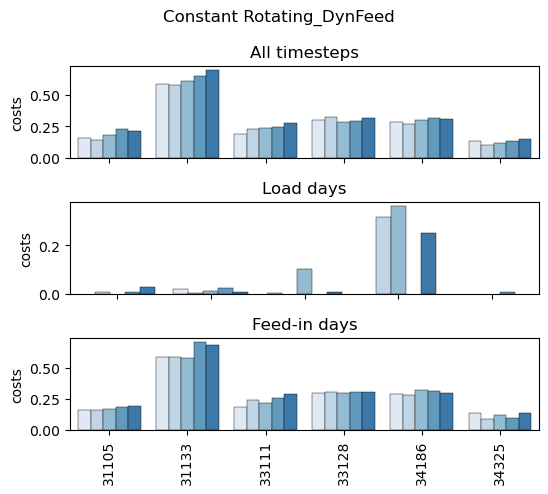

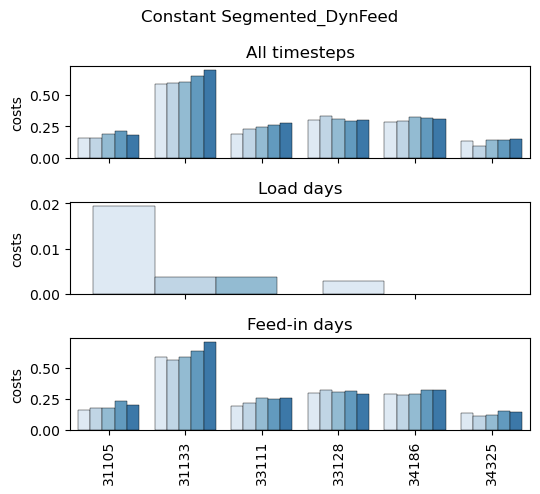

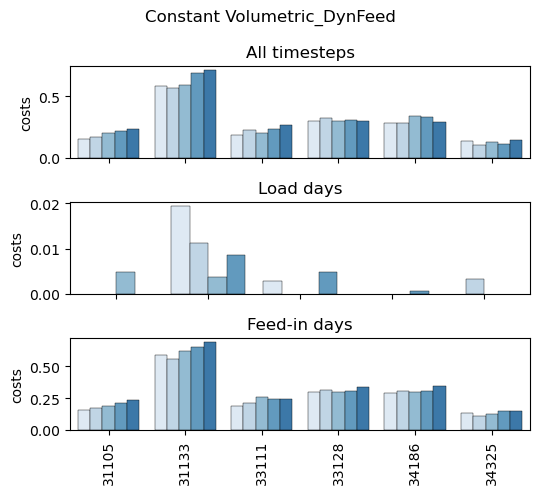

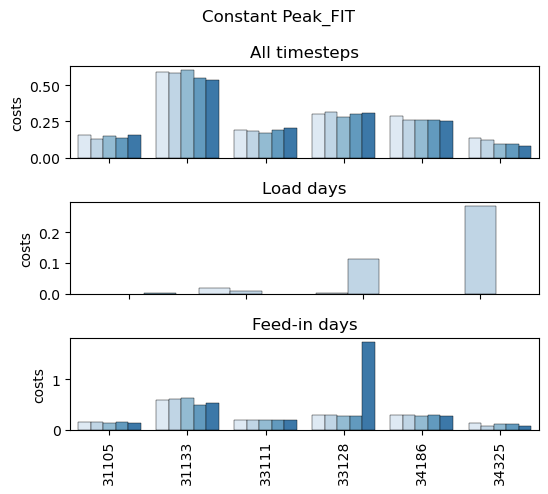

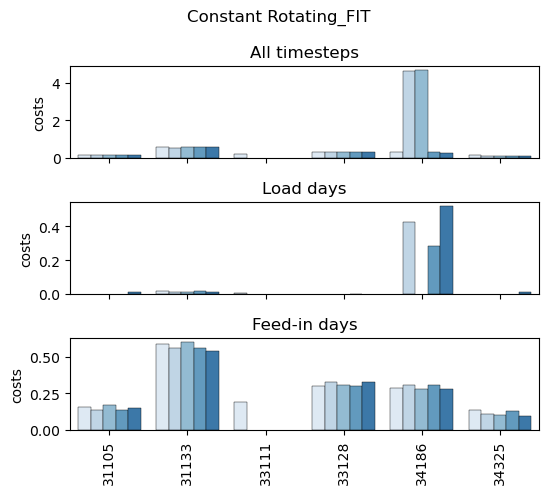

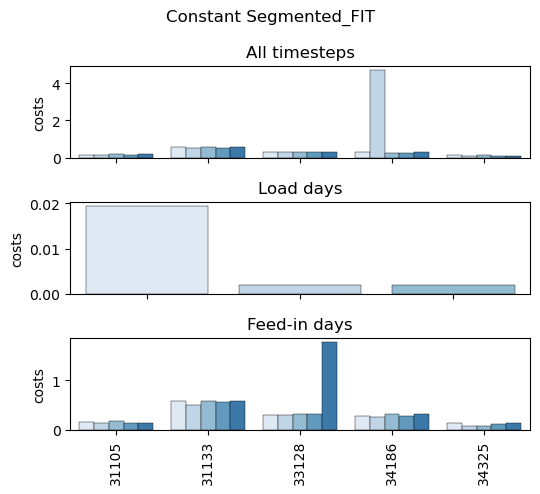

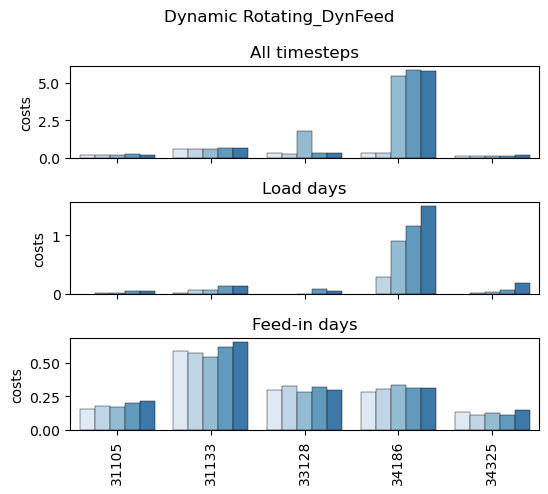

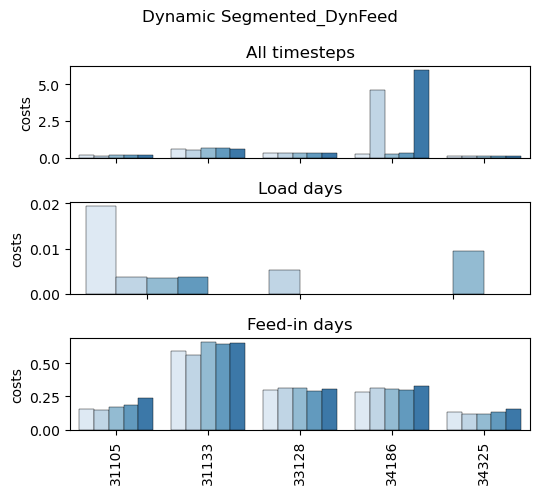

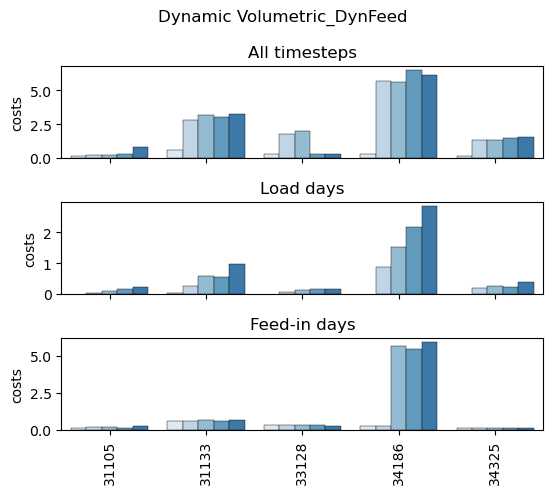

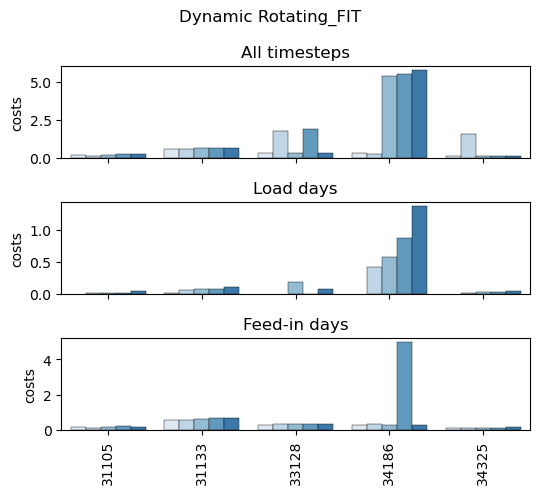

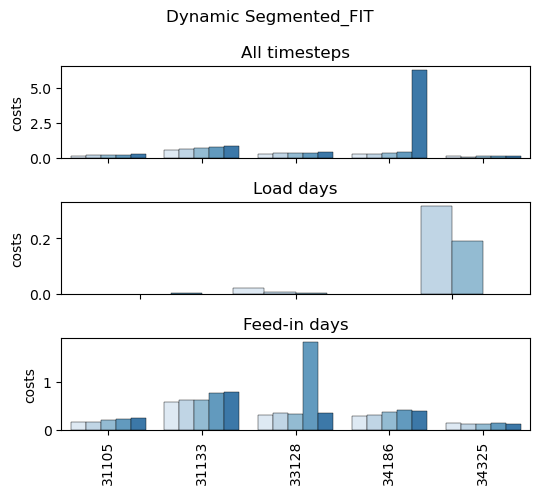

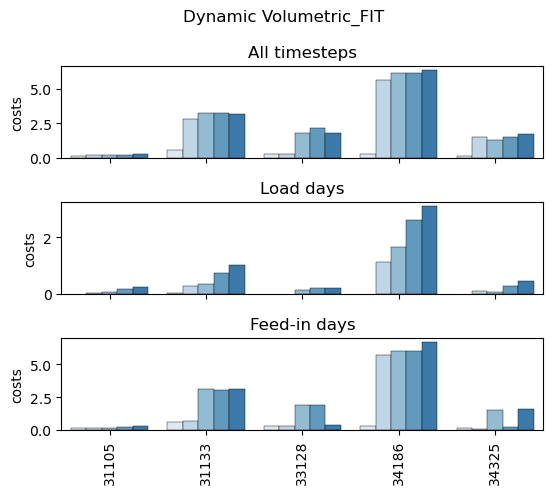

In [27]:
results = grid_reinforcement_costs.copy()
colors_tmp = sns.color_palette("Blues")[:5]
for tariff in grid_reinforcement_costs.tariff.unique():
    if tariff == "Base":
        continue
    img_size =(5.5,5)
    tmp = results.loc[results.tariff == tariff]
    fig, axes = plt.subplots(3, figsize=img_size)
    plt.suptitle(tariff)
    ax=axes[0]
    plot_df = tmp.loc[tmp["mode"]=="debug"]
    sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax, 
                linewidth=0.3, edgecolor="k", legend=False)
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_title("All timesteps")
    ax=axes[1]
    plot_df = tmp.loc[tmp["mode"]=="load"]
    sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax, 
                linewidth=0.3, edgecolor="k", legend=False)
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_title("Load days")
    ax=axes[2]
    plot_df = tmp.loc[tmp["mode"]=="feed-in"]
    sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax, 
                linewidth=0.3, edgecolor="k", legend=False)
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title("Feed-in days")
    plt.tight_layout()

C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\862032543.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


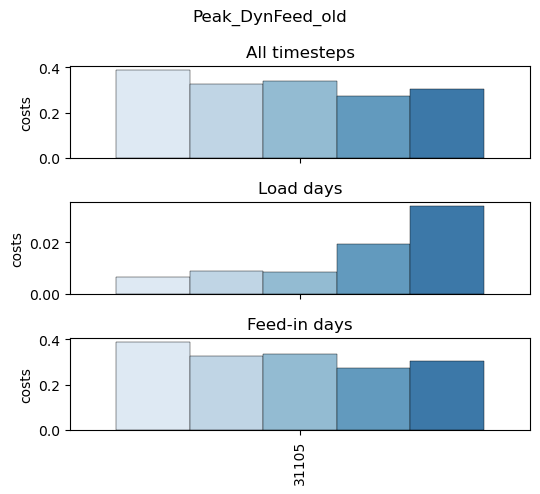

In [48]:
tmp
results = tmp.copy()
colors_tmp = sns.color_palette("Blues")[:5]
for tariff in tmp.tariff.unique():
    if tariff == "Base":
        continue
    img_size =(5.5,5)
    tmp = results.loc[results.tariff == tariff]
    fig, axes = plt.subplots(3, figsize=img_size)
    plt.suptitle(tariff)
    ax=axes[0]
    plot_df = tmp.loc[tmp["mode"]=="debug"]
    sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax, 
                linewidth=0.3, edgecolor="k", legend=False, order=tmp.grid_id.unique())
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_title("All timesteps")
    ax=axes[1]
    plot_df = tmp.loc[tmp["mode"]=="load"]
    sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax, 
                linewidth=0.3, edgecolor="k", legend=False, order=tmp.grid_id.unique())
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_title("Load days")
    ax=axes[2]
    plot_df = tmp.loc[tmp["mode"]=="feed-in"]
    sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax, 
                linewidth=0.3, edgecolor="k", legend=False, order=tmp.grid_id.unique())
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title("Feed-in days")
    plt.tight_layout()

C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\2887882169.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


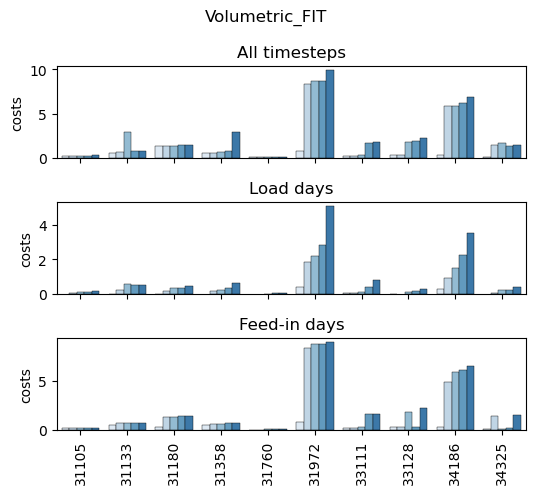

In [75]:
results = results_tmp.copy()
colors_tmp = sns.color_palette("Blues")[:5]
for tariff in tmp.tariff.unique():
    if tariff == "Base":
        continue
    img_size =(5.5,5)
    tmp = results.loc[results.tariff == tariff]
    fig, axes = plt.subplots(3, figsize=img_size)
    plt.suptitle(tariff)
    ax=axes[0]
    plot_df = tmp.loc[tmp["mode"]=="debug"]
    sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax, 
                linewidth=0.3, edgecolor="k", legend=False, order=tmp.grid_id.unique())
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_title("All timesteps")
    ax=axes[1]
    plot_df = tmp.loc[tmp["mode"]=="load"]
    sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax, 
                linewidth=0.3, edgecolor="k", legend=False, order=tmp.grid_id.unique())
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_title("Load days")
    ax=axes[2]
    plot_df = tmp.loc[tmp["mode"]=="feed-in"]
    sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax, 
                linewidth=0.3, edgecolor="k", legend=False, order=tmp.grid_id.unique())
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title("Feed-in days")
    plt.tight_layout()

In [70]:
tmp

,tariff,penetration,mode,grid_id,costs,costs_lv,costs_mv,costs_mvlv
0,Volumetric_FIT,0.00,debug,all,4.313541,3.263541,0.0,1.05
1,Volumetric_FIT,0.00,feed-in,all,3.244165,2.224165,0.0,1.02
2,Volumetric_FIT,0.00,load,all,0.693407,0.693407,0.0,0.00
3,Volumetric_FIT,0.25,debug,all,18.935184,17.705184,0.0,1.23
4,Volumetric_FIT,0.25,feed-in,all,17.934564,16.734564,0.0,1.20
5,Volumetric_FIT,0.25,load,all,3.430119,3.170119,0.0,0.26
6,Volumetric_FIT,0.50,debug,all,23.474889,22.224889,0.0,1.25
7,Volumetric_FIT,0.50,feed-in,all,19.538340,18.338340,0.0,1.20
8,Volumetric_FIT,0.50,load,all,5.406595,5.086595,0.0,0.32
9,Volumetric_FIT,0.75,debug,all,22.916760,21.566760,0.0,1.35


C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\2866611301.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\2866611301.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\2866611301.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\2866611301.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(

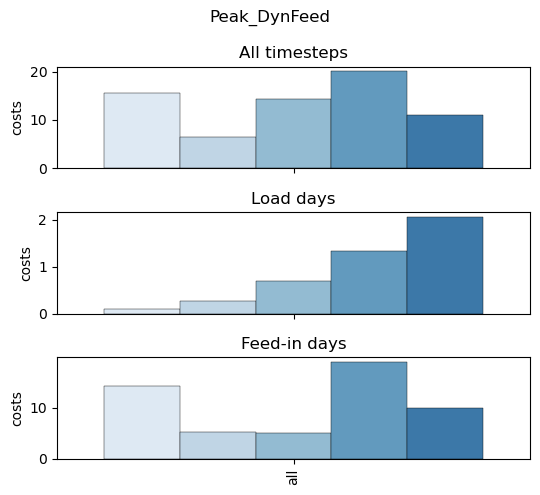

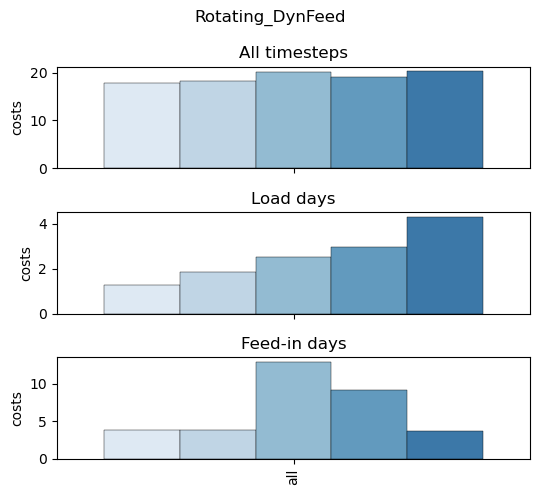

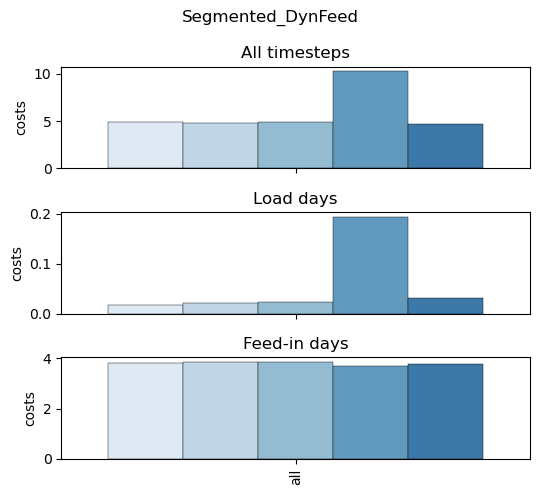

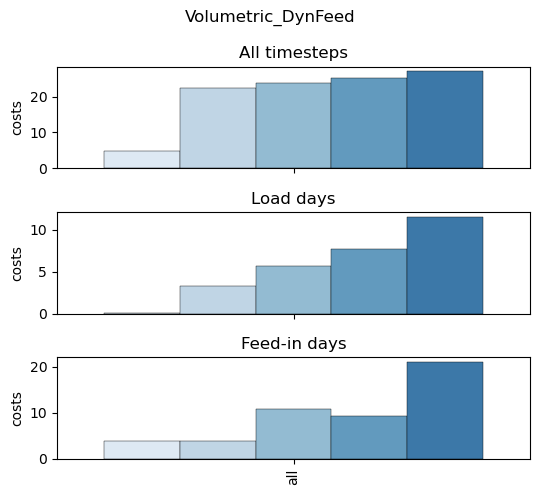

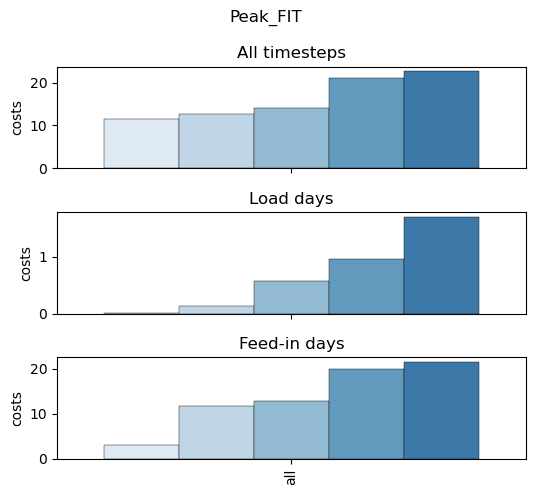

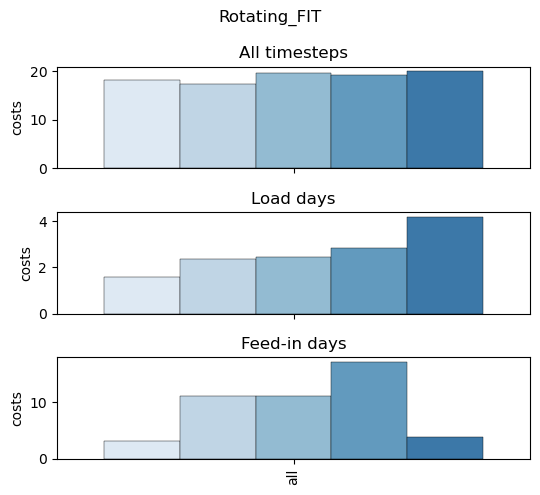

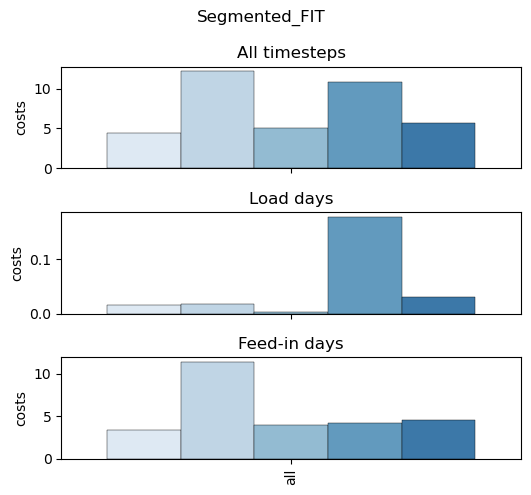

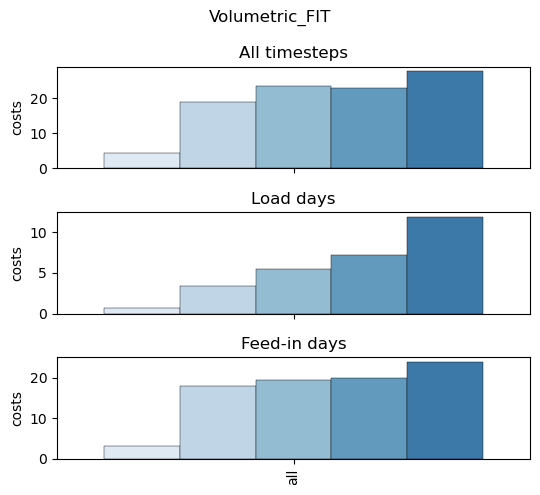

In [72]:
tmp
results = tmp.groupby(["tariff", "penetration", "mode"]).sum().reset_index()
results["grid_id"] = "all"
colors_tmp = sns.color_palette("Blues")[:5]
for tariff in tmp.tariff.unique():
    if tariff == "Base":
        continue
    img_size =(5.5,5)
    tmp = results.loc[results.tariff == tariff]
    fig, axes = plt.subplots(3, figsize=img_size)
    plt.suptitle(tariff)
    ax=axes[0]
    plot_df = tmp.loc[tmp["mode"]=="debug"]
    sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax, 
                linewidth=0.3, edgecolor="k", legend=False, order=tmp.grid_id.unique())
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_title("All timesteps")
    ax=axes[1]
    plot_df = tmp.loc[tmp["mode"]=="load"]
    sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax, 
                linewidth=0.3, edgecolor="k", legend=False, order=tmp.grid_id.unique())
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_title("Load days")
    ax=axes[2]
    plot_df = tmp.loc[tmp["mode"]=="feed-in"]
    sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax, 
                linewidth=0.3, edgecolor="k", legend=False, order=tmp.grid_id.unique())
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title("Feed-in days")
    plt.tight_layout()

C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\3976093527.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\3976093527.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\3976093527.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\3976093527.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(

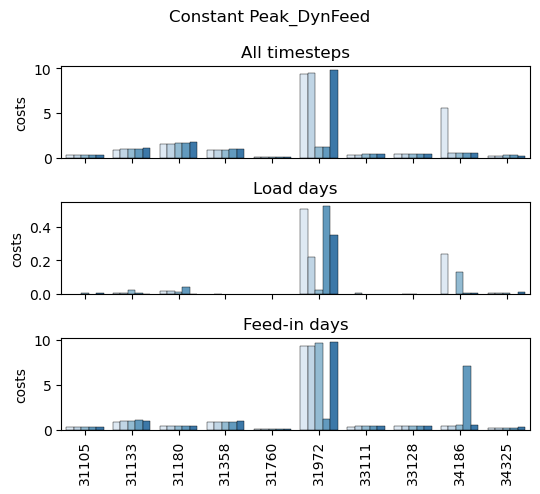

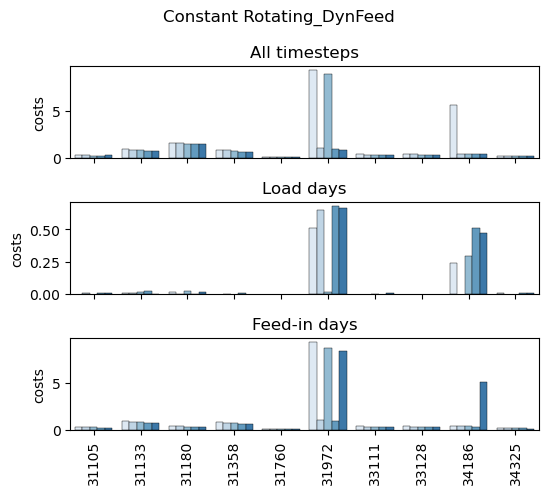

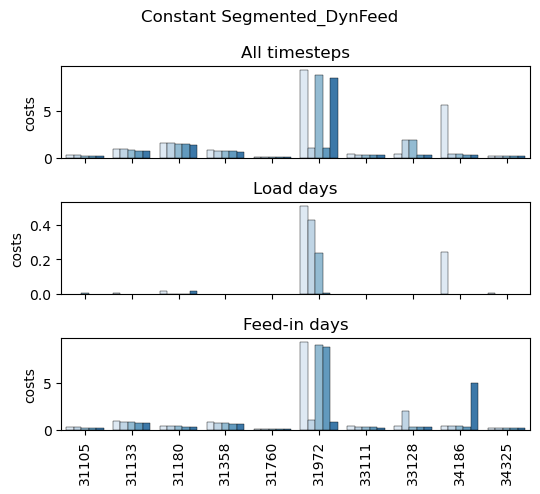

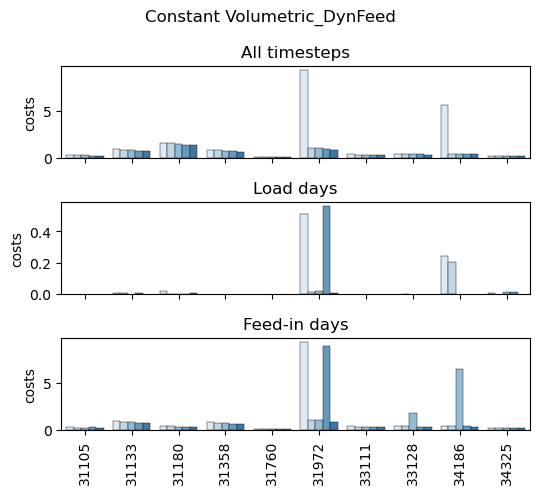

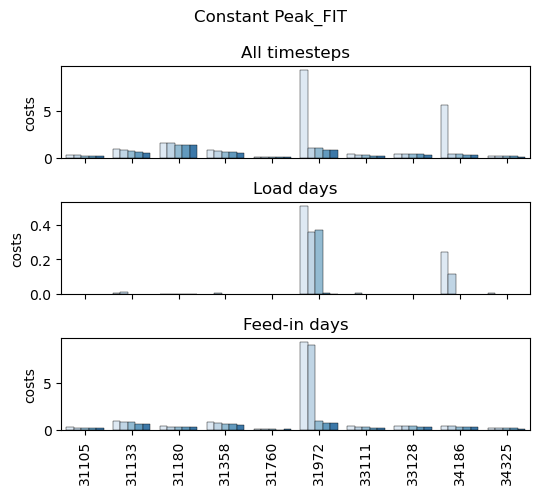

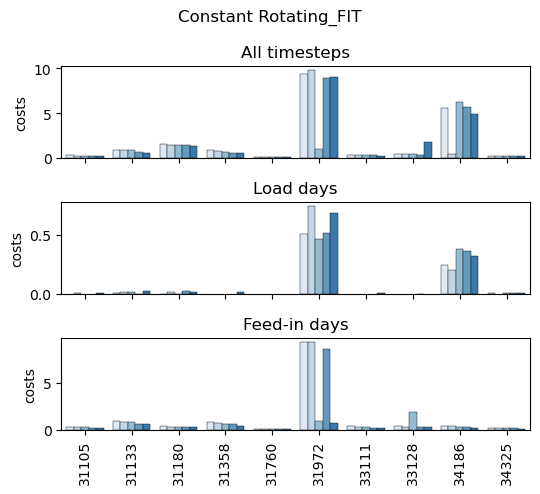

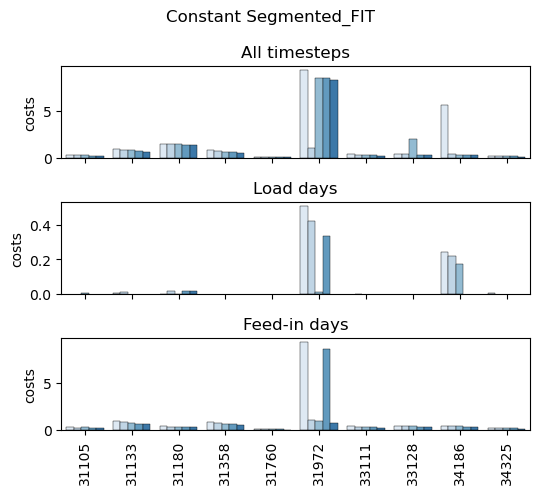

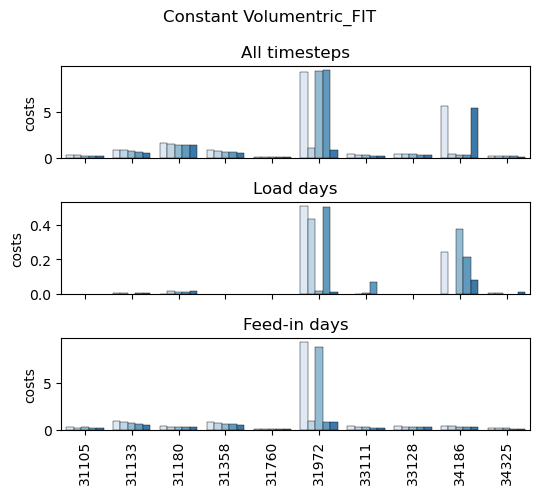

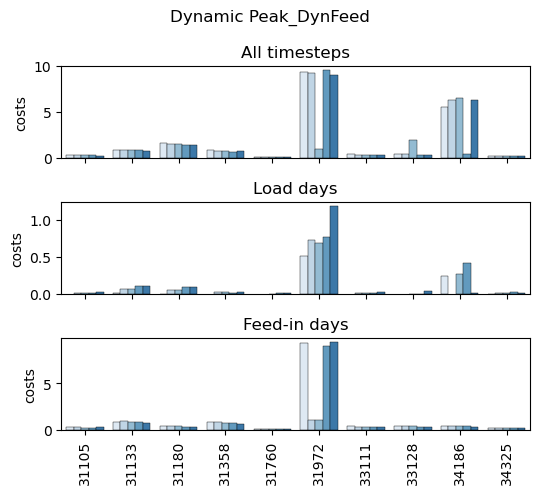

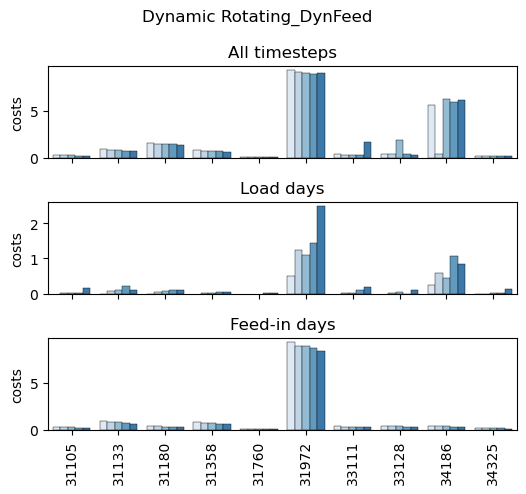

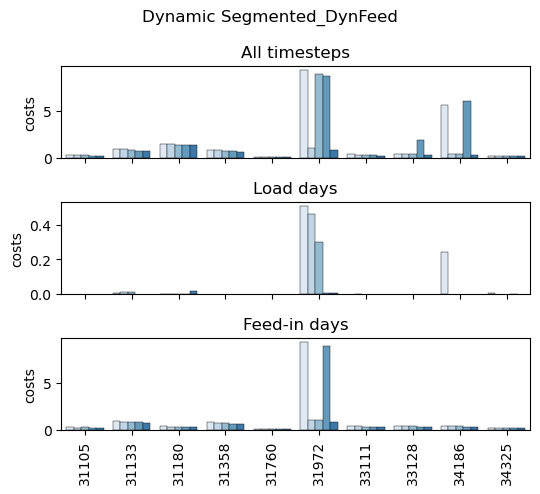

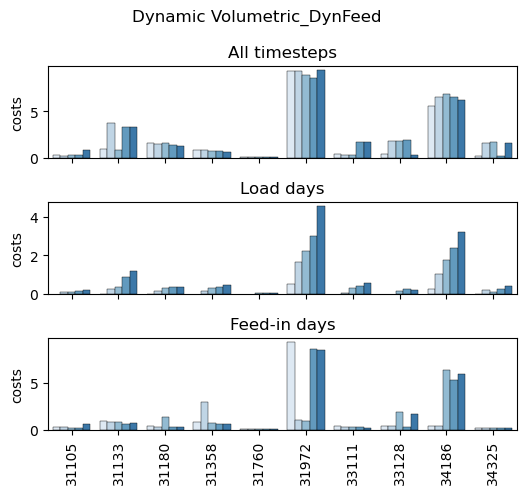

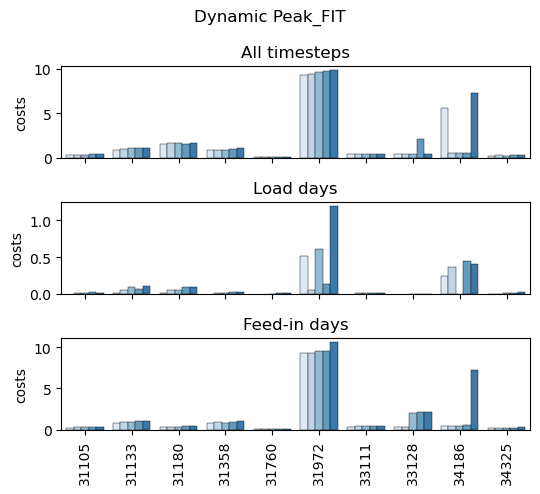

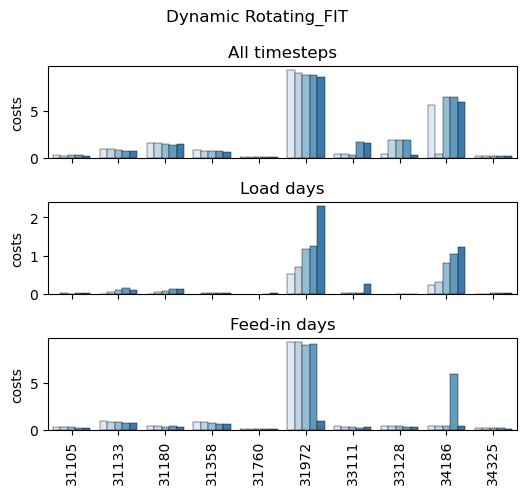

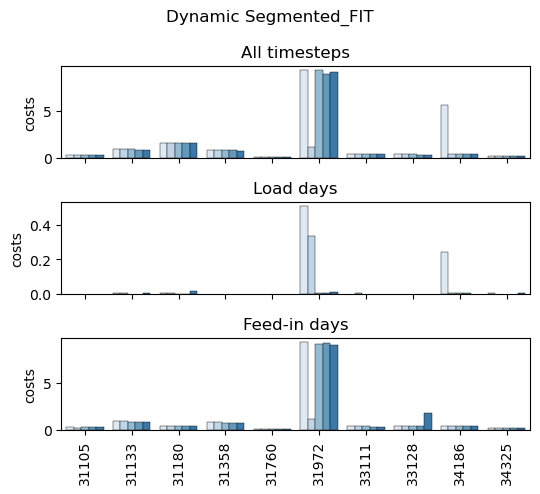

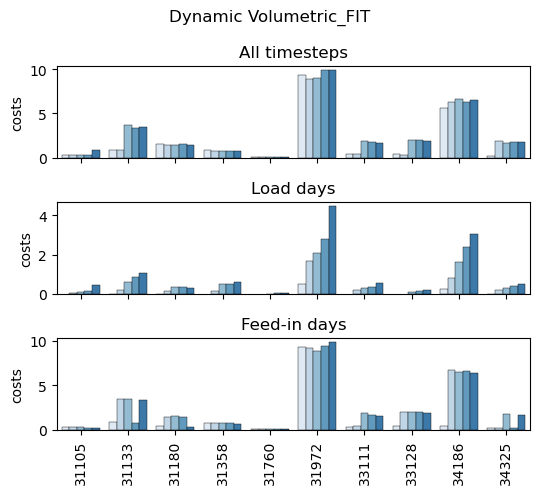

In [18]:
results = grid_reinforcement_costs.copy()
colors_tmp = sns.color_palette("Blues")[:5]
for tariff in grid_reinforcement_costs.tariff.unique():
    if tariff == "Base":
        continue
    img_size =(5.5,5)
    tmp = results.loc[results.tariff == tariff]
    fig, axes = plt.subplots(3, figsize=img_size)
    plt.suptitle(tariff)
    ax=axes[0]
    plot_df = tmp.loc[tmp["mode"]=="debug"]
    sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax, 
                linewidth=0.3, edgecolor="k", legend=False, order=grid_reinforcement_costs.grid_id.unique())
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_title("All timesteps")
    ax=axes[1]
    plot_df = tmp.loc[tmp["mode"]=="load"]
    sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax, 
                linewidth=0.3, edgecolor="k", legend=False, order=grid_reinforcement_costs.grid_id.unique())
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_title("Load days")
    ax=axes[2]
    plot_df = tmp.loc[tmp["mode"]=="feed-in"]
    sns.barplot(data=plot_df, x="grid_id", hue="penetration", y="costs", palette=colors_tmp, ax=ax, 
                linewidth=0.3, edgecolor="k", legend=False, order=grid_reinforcement_costs.grid_id.unique())
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title("Feed-in days")
    plt.tight_layout()

C:\Users\aheider\AppData\Local\Temp\ipykernel_2100\4265439210.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\aheider\AppData\Local\Temp\ipykernel_2100\4265439210.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when leg

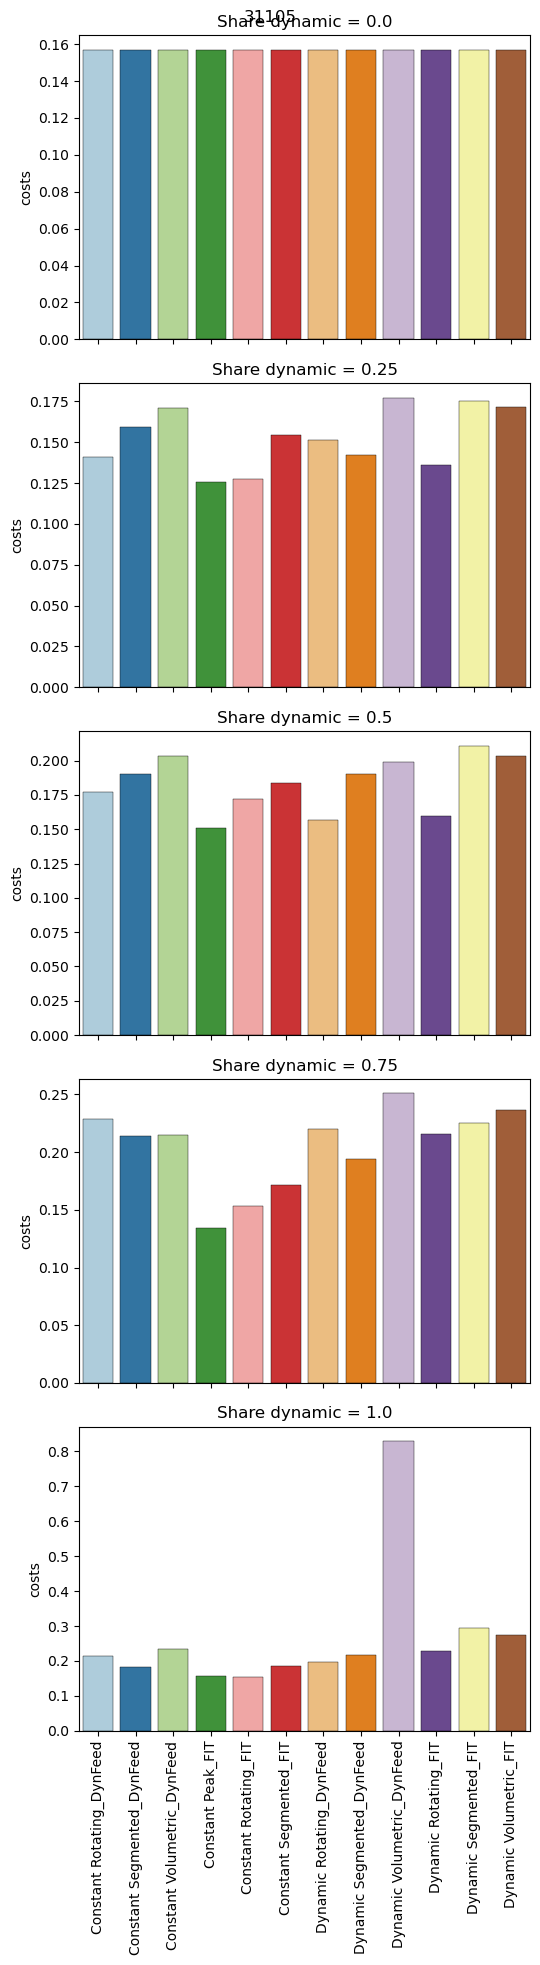

In [28]:
# Todo: in the end add up all grids
grid_id = "31105"
colors_tmp = sns.color_palette("Paired")
img_size =(5.5,20)
tmp = results.loc[results.grid_id == grid_id]
fig, axes = plt.subplots(5, figsize=img_size)
plt.suptitle(grid_id)
for idx, share_dyn in enumerate(penetrations):
    ax=axes[idx]
    plot_df = tmp.loc[(tmp["mode"]=="debug")&(tmp.penetration==share_dyn)]
    sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k")
    ax.set_xlabel("")
    if idx < 4:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f"Share dynamic = {share_dyn}")
    ax.legend().remove()
plt.tight_layout()

C:\Users\aheider\AppData\Local\Temp\ipykernel_13612\858144717.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k")
C:\Users\aheider\AppData\Local\Temp\ipykernel_13612\858144717.py:11: UserWarning: 
The palette list has fewer values (12) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\aheider\AppData\Local\Temp\ipykernel_13612\858144717.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Ass

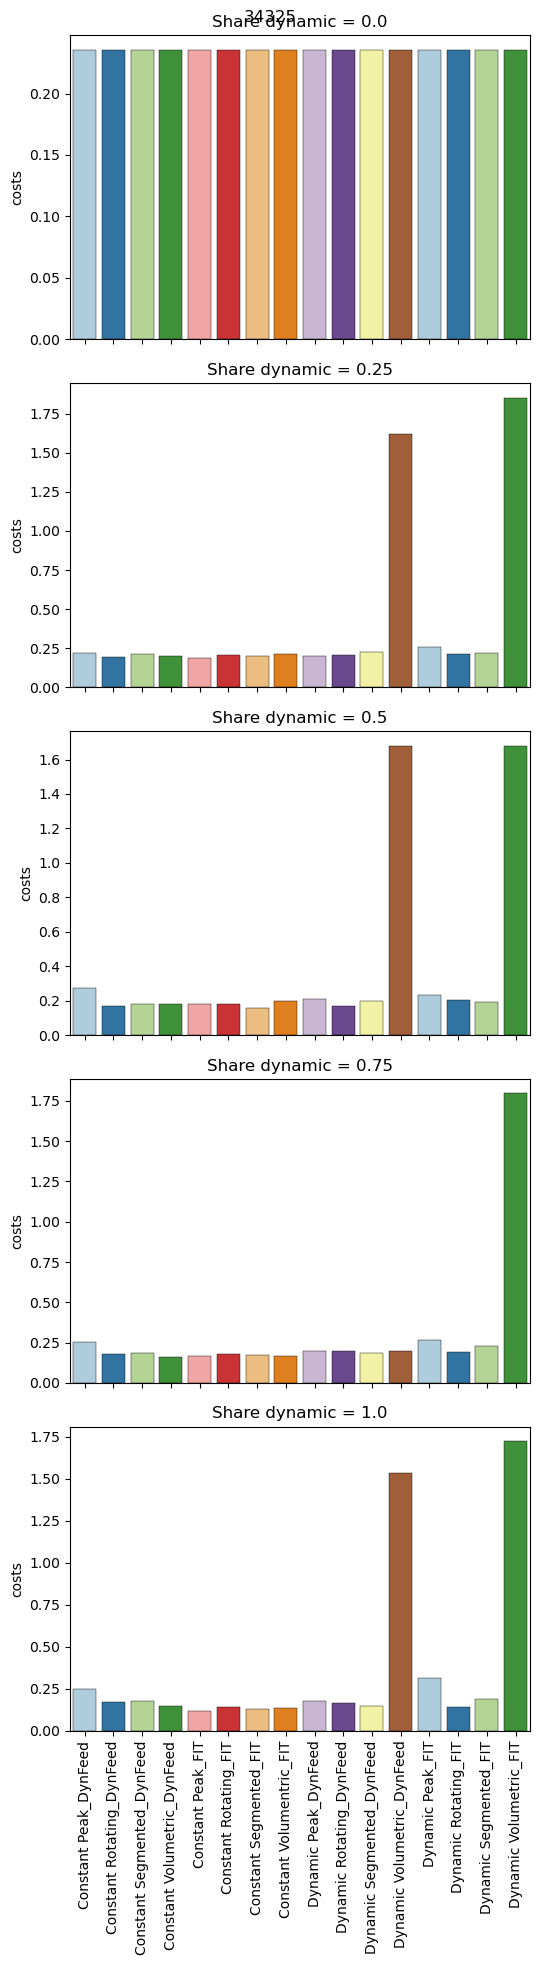

In [11]:
# Todo: in the end add up all grids
grid_id = "34325"
colors_tmp = sns.color_palette("Paired")
img_size =(5.5,20)
tmp = results.loc[results.grid_id == grid_id]
fig, axes = plt.subplots(5, figsize=img_size)
plt.suptitle(grid_id)
for idx, share_dyn in enumerate(penetrations):
    ax=axes[idx]
    plot_df = tmp.loc[(tmp["mode"]=="debug")&(tmp.penetration==share_dyn)]
    sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k")
    ax.set_xlabel("")
    if idx < 4:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f"Share dynamic = {share_dyn}")
    ax.legend().remove()
plt.tight_layout()

In [12]:
plot_df

,grid_id,tariff,penetration,mode,costs,costs_lv,costs_mv,costs_mvlv
0,34325,Constant Peak_DynFeed,1.0,debug,0.248873,0.208873,0.0,0.04
0,34325,Constant Rotating_DynFeed,1.0,debug,0.169886,0.139886,0.0,0.03
0,34325,Constant Segmented_DynFeed,1.0,debug,0.178203,0.158203,0.0,0.02
0,34325,Constant Volumetric_DynFeed,1.0,debug,0.148769,0.128769,0.0,0.02
0,34325,Constant Peak_FIT,1.0,debug,0.117194,0.107194,0.0,0.01
0,34325,Constant Rotating_FIT,1.0,debug,0.143237,0.123237,0.0,0.02
0,34325,Constant Segmented_FIT,1.0,debug,0.129848,0.109848,0.0,0.02
0,34325,Constant Volumentric_FIT,1.0,debug,0.135340,0.115340,0.0,0.02
0,34325,Dynamic Peak_DynFeed,1.0,debug,0.174865,0.154865,0.0,0.02
0,34325,Dynamic Rotating_DynFeed,1.0,debug,0.162490,0.152490,0.0,0.01


C:\Users\aheider\AppData\Local\Temp\ipykernel_13612\3081903630.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k")
C:\Users\aheider\AppData\Local\Temp\ipykernel_13612\3081903630.py:11: UserWarning: 
The palette list has fewer values (12) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\aheider\AppData\Local\Temp\ipykernel_13612\3081903630.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 

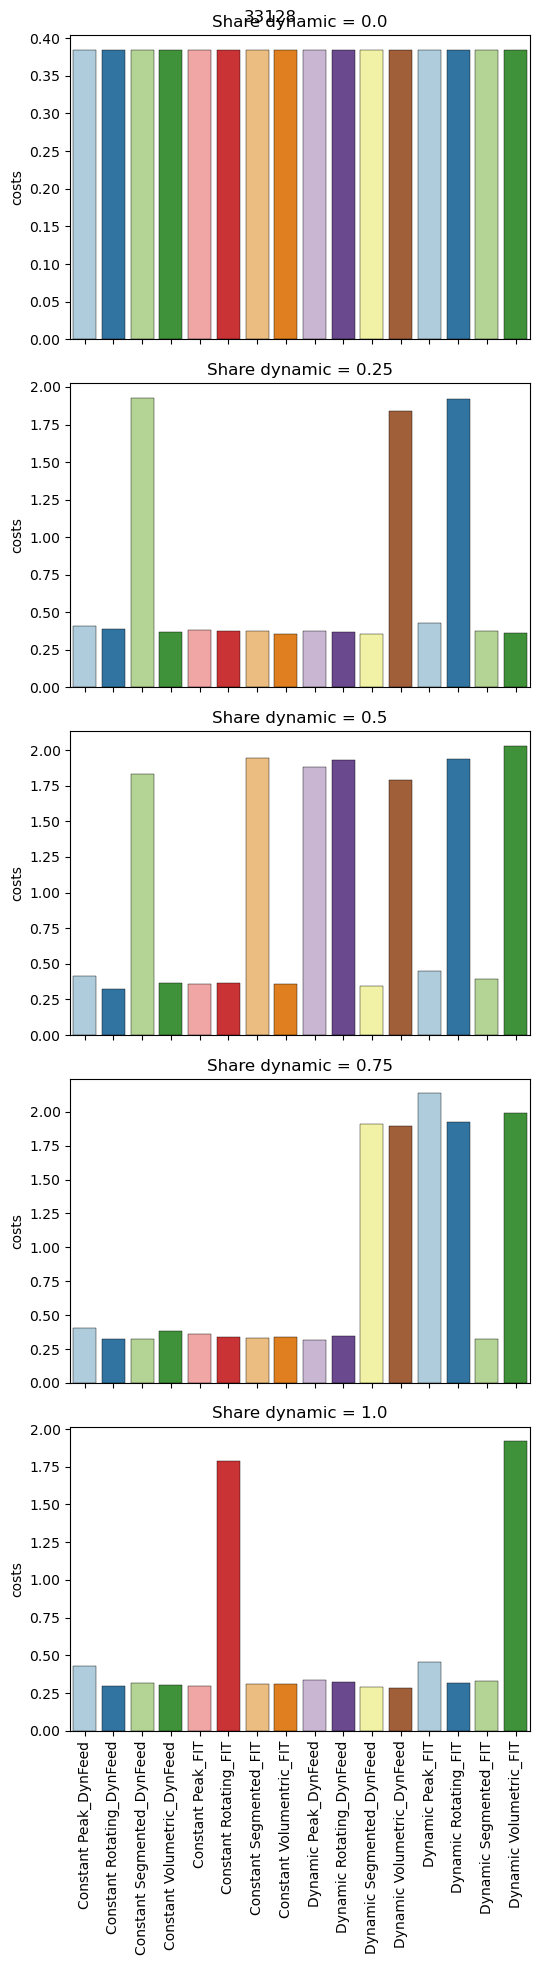

In [14]:
# Todo: in the end add up all grids
grid_id = "33128"
colors_tmp = sns.color_palette("Paired")
img_size =(5.5,20)
tmp = results.loc[results.grid_id == grid_id]
fig, axes = plt.subplots(5, figsize=img_size)
plt.suptitle(grid_id)
for idx, share_dyn in enumerate(penetrations):
    ax=axes[idx]
    plot_df = tmp.loc[(tmp["mode"]=="debug")&(tmp.penetration==share_dyn)]
    sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k")
    ax.set_xlabel("")
    if idx < 4:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f"Share dynamic = {share_dyn}")
    ax.legend().remove()
plt.tight_layout()

In [15]:
plot_df

,grid_id,tariff,penetration,mode,costs,costs_lv,costs_mv,costs_mvlv
0,33128,Constant Peak_DynFeed,1.0,debug,0.430980,0.130980,0.0,0.30
0,33128,Constant Rotating_DynFeed,1.0,debug,0.299979,0.109979,0.0,0.19
0,33128,Constant Segmented_DynFeed,1.0,debug,0.318613,0.118613,0.0,0.20
0,33128,Constant Volumetric_DynFeed,1.0,debug,0.302353,0.112353,0.0,0.19
0,33128,Constant Peak_FIT,1.0,debug,0.297967,0.107967,0.0,0.19
0,33128,Constant Rotating_FIT,1.0,debug,1.787877,1.587877,0.0,0.20
0,33128,Constant Segmented_FIT,1.0,debug,0.310182,0.110182,0.0,0.20
0,33128,Constant Volumentric_FIT,1.0,debug,0.311355,0.111355,0.0,0.20
0,33128,Dynamic Peak_DynFeed,1.0,debug,0.339834,0.119834,0.0,0.22
0,33128,Dynamic Rotating_DynFeed,1.0,debug,0.323509,0.103509,0.0,0.22


C:\Users\aheider\AppData\Local\Temp\ipykernel_13612\3445364213.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k")
C:\Users\aheider\AppData\Local\Temp\ipykernel_13612\3445364213.py:11: UserWarning: 
The palette list has fewer values (12) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\aheider\AppData\Local\Temp\ipykernel_13612\3445364213.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 

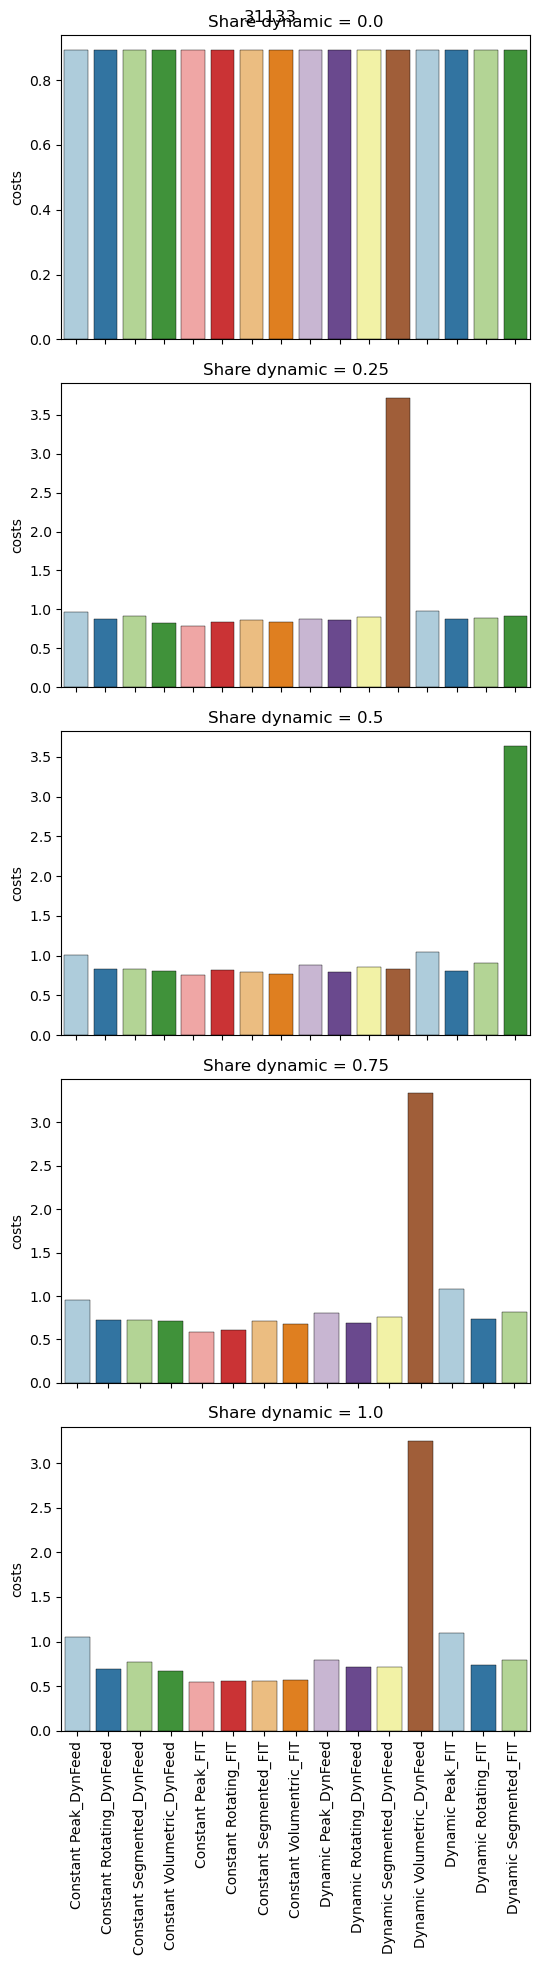

In [16]:
# Todo: in the end add up all grids
grid_id = "31133"
colors_tmp = sns.color_palette("Paired")
img_size =(5.5,20)
tmp = results.loc[results.grid_id == grid_id]
fig, axes = plt.subplots(5, figsize=img_size)
plt.suptitle(grid_id)
for idx, share_dyn in enumerate(penetrations):
    ax=axes[idx]
    plot_df = tmp.loc[(tmp["mode"]=="debug")&(tmp.penetration==share_dyn)]
    sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k")
    ax.set_xlabel("")
    if idx < 4:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f"Share dynamic = {share_dyn}")
    ax.legend().remove()
plt.tight_layout()

In [17]:
plot_df

,grid_id,tariff,penetration,mode,costs,costs_lv,costs_mv,costs_mvlv
0,31133,Constant Peak_DynFeed,1.0,debug,1.053321,0.923321,0.0,0.13
0,31133,Constant Rotating_DynFeed,1.0,debug,0.689861,0.589861,0.0,0.10
0,31133,Constant Segmented_DynFeed,1.0,debug,0.767922,0.657922,0.0,0.11
0,31133,Constant Volumetric_DynFeed,1.0,debug,0.670927,0.560927,0.0,0.11
0,31133,Constant Peak_FIT,1.0,debug,0.547412,0.457412,0.0,0.09
0,31133,Constant Rotating_FIT,1.0,debug,0.557717,0.497717,0.0,0.06
0,31133,Constant Segmented_FIT,1.0,debug,0.561651,0.471651,0.0,0.09
0,31133,Constant Volumentric_FIT,1.0,debug,0.569086,0.479086,0.0,0.09
0,31133,Dynamic Peak_DynFeed,1.0,debug,0.789562,0.689562,0.0,0.10
0,31133,Dynamic Rotating_DynFeed,1.0,debug,0.710433,0.630433,0.0,0.08


In [19]:
results = grid_reinforcement_costs.copy()
tmp = results.groupby(["tariff", "penetration", "mode"]).sum().reset_index()

In [24]:
plot_df.set_index("tariff").loc[['Constant Volumentric_FIT',
       'Dynamic Volumetric_FIT', 'Constant Volumetric_DynFeed',
       'Dynamic Volumetric_DynFeed', 'Constant Peak_FIT', 'Dynamic Peak_FIT',
       'Constant Peak_DynFeed', 'Dynamic Peak_DynFeed',
       'Constant Rotating_FIT', 'Dynamic Rotating_FIT',
       'Constant Rotating_DynFeed', 'Dynamic Rotating_DynFeed',
       'Constant Segmented_FIT', 'Dynamic Segmented_FIT',
       'Constant Segmented_DynFeed', 'Dynamic Segmented_DynFeed']]

,penetration,mode,grid_id,costs,costs_lv,costs_mv,costs_mvlv
tariff,,,,,,,
Constant Volumentric_FIT,1.0,debug,3110531133311803135831760319723311133128341863...,9.427372,8.297372,0.0,1.13
Dynamic Volumetric_FIT,1.0,debug,3110531133311803135831760319723311133128341863...,28.252858,26.832858,0.0,1.42
Constant Volumetric_DynFeed,1.0,debug,3110531133311803135831760319723311133128341863...,4.791745,3.571745,0.0,1.22
Dynamic Volumetric_DynFeed,1.0,debug,3110531133311803135831760319723311133128341863...,25.241626,23.941626,0.0,1.30
Constant Peak_FIT,1.0,debug,3110531133311803135831760319723311133128341863...,4.200640,3.140640,0.0,1.06
Dynamic Peak_FIT,1.0,debug,3110531133311803135831760319723311133128341863...,22.615710,20.845710,0.0,1.77
Constant Peak_DynFeed,1.0,debug,3110531133311803135831760319723311133128341863...,15.660604,13.920604,0.0,1.74
Dynamic Peak_DynFeed,1.0,debug,3110531133311803135831760319723311133128341863...,19.275218,17.915218,0.0,1.36
Constant Rotating_FIT,1.0,debug,3110531133311803135831760319723311133128341863...,18.633140,17.513140,0.0,1.12


C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\1707764972.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k", order=order)
C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\1707764972.py:18: UserWarning: 
The palette list has fewer values (12) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k", order=order)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\1707764972.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

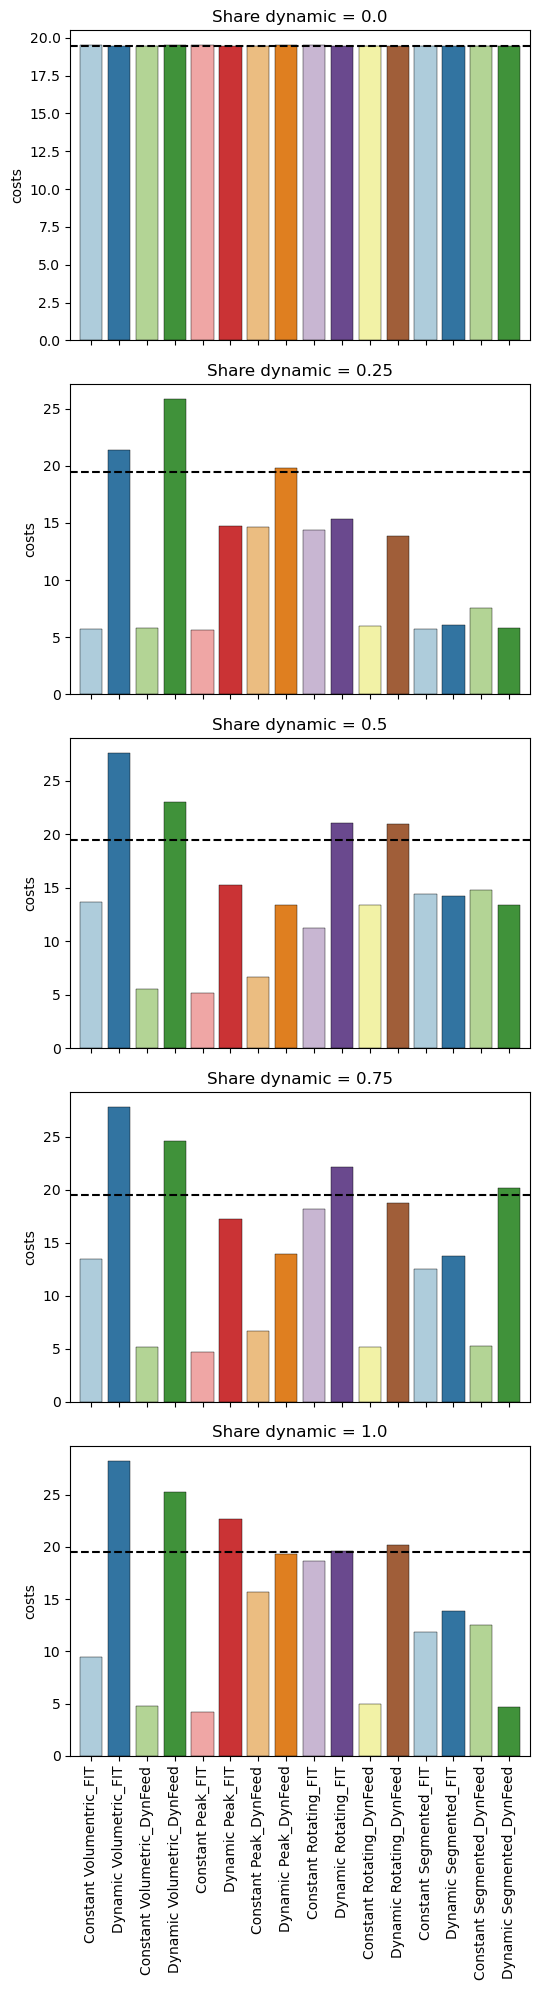

In [32]:
# Todo: in the end add up all grids
order = ['Constant Volumentric_FIT',
       'Dynamic Volumetric_FIT', 'Constant Volumetric_DynFeed',
       'Dynamic Volumetric_DynFeed', 'Constant Peak_FIT', 'Dynamic Peak_FIT',
       'Constant Peak_DynFeed', 'Dynamic Peak_DynFeed',
       'Constant Rotating_FIT', 'Dynamic Rotating_FIT',
       'Constant Rotating_DynFeed', 'Dynamic Rotating_DynFeed',
       'Constant Segmented_FIT', 'Dynamic Segmented_FIT',
       'Constant Segmented_DynFeed', 'Dynamic Segmented_DynFeed']
colors_tmp = sns.color_palette("Paired")
img_size =(5.5,20)
fig, axes = plt.subplots(5, figsize=img_size)
costs_constant = tmp.loc[(tmp["mode"]=="debug")&(tmp.penetration==0.0)].costs[0]

for idx, share_dyn in enumerate(penetrations):
    ax=axes[idx]
    plot_df = tmp.loc[(tmp["mode"]=="debug")&(tmp.penetration==share_dyn)]
    sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k", order=order)
    ax.hlines(y=costs_constant, xmin=-0.75, xmax=15.75, color="k", linestyle="--")
    ax.set_xlabel("")
    ax.set_xlim(-0.75,15.75)
    if idx < 4:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f"Share dynamic = {share_dyn}")
    ax.legend().remove()
plt.tight_layout()

In [27]:
tmp.loc[(tmp["mode"]=="debug")&(tmp.penetration==0.0)].costs[0]

19.461506039361744

C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\2157502894.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k", order=order)
C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\2157502894.py:19: UserWarning: 
The palette list has fewer values (12) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k", order=order)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\2157502894.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

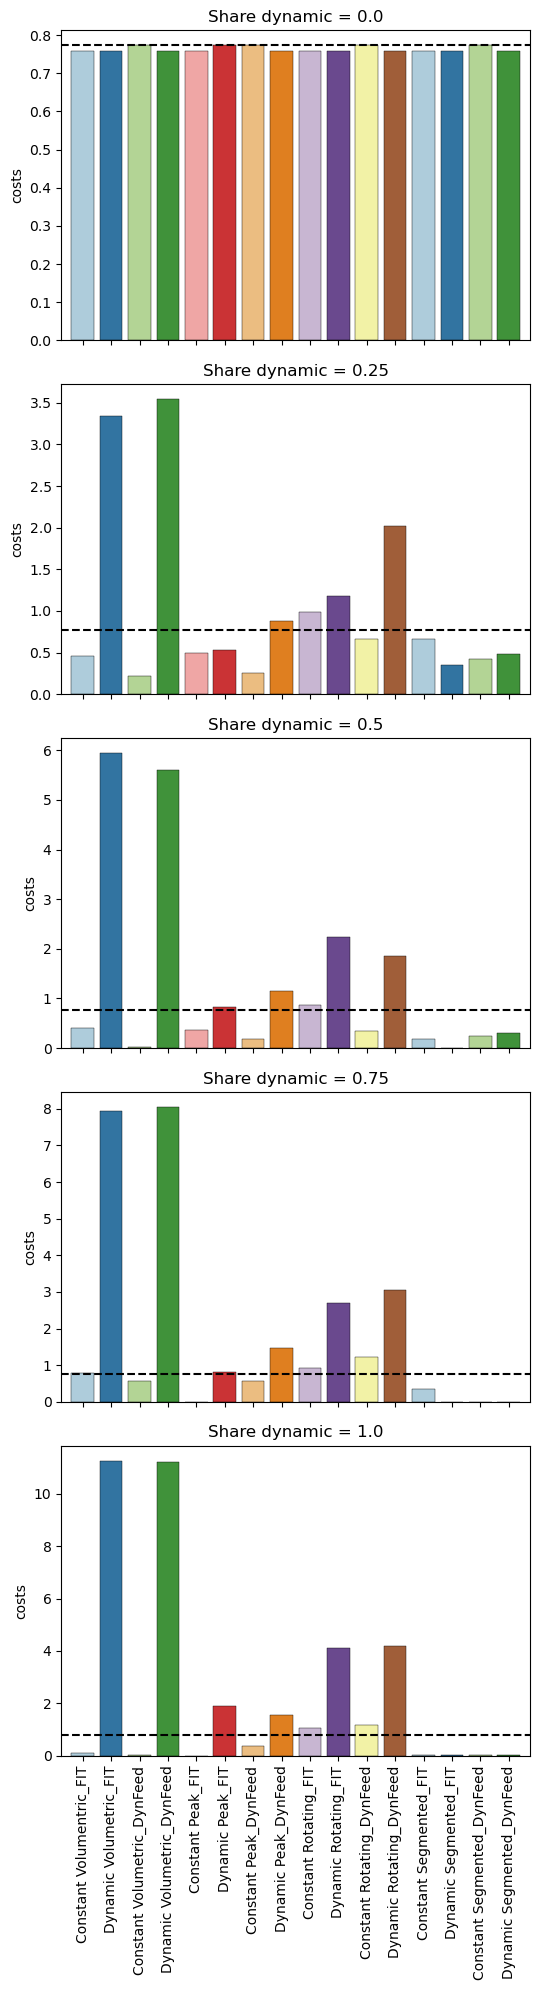

In [35]:
# Todo: in the end add up all grids
order = ['Constant Volumentric_FIT',
       'Dynamic Volumetric_FIT', 'Constant Volumetric_DynFeed',
       'Dynamic Volumetric_DynFeed', 'Constant Peak_FIT', 'Dynamic Peak_FIT',
       'Constant Peak_DynFeed', 'Dynamic Peak_DynFeed',
       'Constant Rotating_FIT', 'Dynamic Rotating_FIT',
       'Constant Rotating_DynFeed', 'Dynamic Rotating_DynFeed',
       'Constant Segmented_FIT', 'Dynamic Segmented_FIT',
       'Constant Segmented_DynFeed', 'Dynamic Segmented_DynFeed']
colors_tmp = sns.color_palette("Paired")
img_size =(5.5,20)
fig, axes = plt.subplots(5, figsize=img_size)
mode = "load"
costs_constant = tmp.loc[(tmp["mode"]==mode)&(tmp.penetration==0.0)].costs.iloc[0]

for idx, share_dyn in enumerate(penetrations):
    ax=axes[idx]
    plot_df = tmp.loc[(tmp["mode"]==mode)&(tmp.penetration==share_dyn)]
    sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k", order=order)
    ax.hlines(y=costs_constant, xmin=-0.75, xmax=15.75, color="k", linestyle="--")
    ax.set_xlabel("")
    ax.set_xlim(-0.75,15.75)
    if idx < 4:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f"Share dynamic = {share_dyn}")
    ax.legend().remove()
plt.tight_layout()

In [59]:
costs_constant

13.212787644410264

C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\3023308236.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k", order=order)
C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\3023308236.py:19: UserWarning: 
The palette list has fewer values (12) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k", order=order)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\3023308236.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

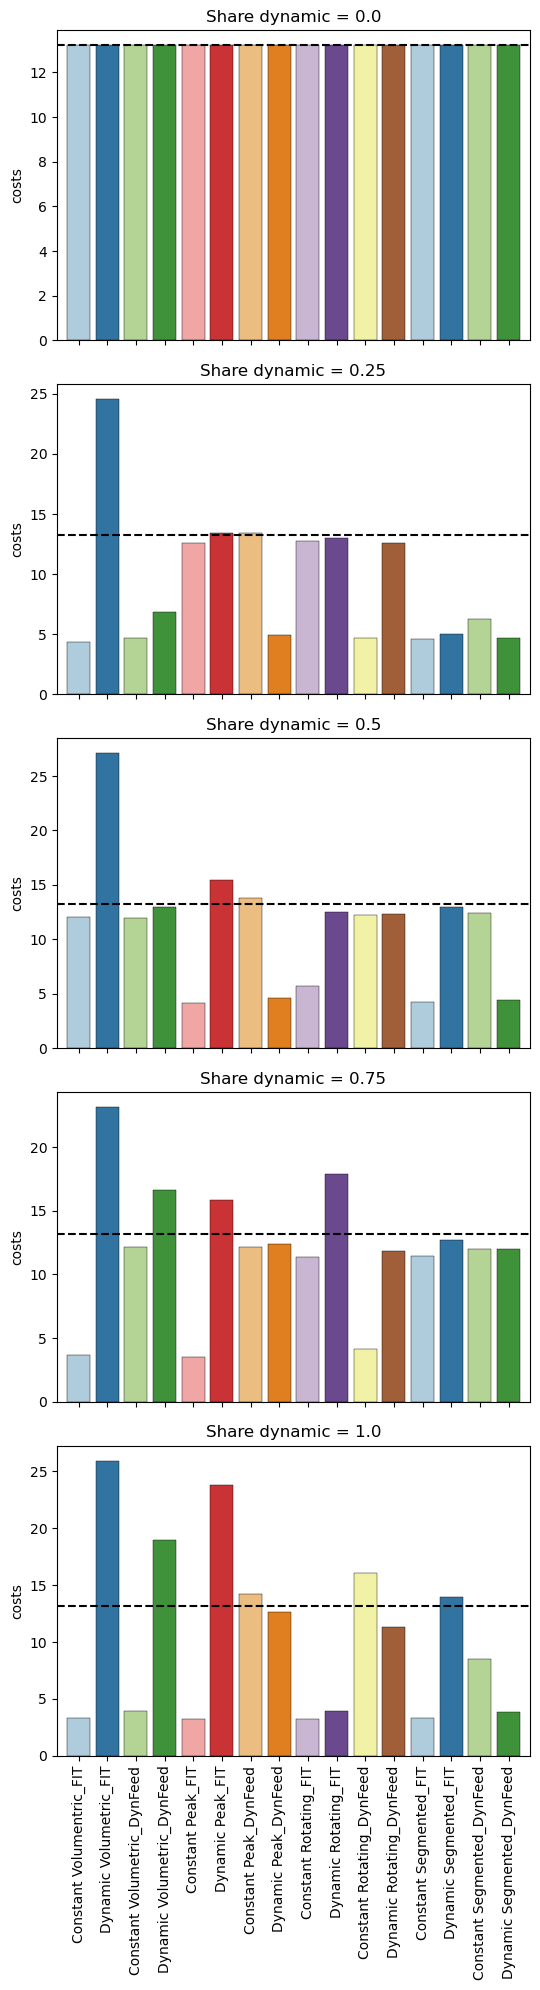

In [37]:
# Todo: in the end add up all grids
order = ['Constant Volumentric_FIT',
       'Dynamic Volumetric_FIT', 'Constant Volumetric_DynFeed',
       'Dynamic Volumetric_DynFeed', 'Constant Peak_FIT', 'Dynamic Peak_FIT',
       'Constant Peak_DynFeed', 'Dynamic Peak_DynFeed',
       'Constant Rotating_FIT', 'Dynamic Rotating_FIT',
       'Constant Rotating_DynFeed', 'Dynamic Rotating_DynFeed',
       'Constant Segmented_FIT', 'Dynamic Segmented_FIT',
       'Constant Segmented_DynFeed', 'Dynamic Segmented_DynFeed']
colors_tmp = sns.color_palette("Paired")
img_size =(5.5,20)
fig, axes = plt.subplots(5, figsize=img_size)
mode = "feed-in"
costs_constant = tmp.loc[(tmp["mode"]==mode)&(tmp.penetration==0.0)].costs.iloc[0]

for idx, share_dyn in enumerate(penetrations):
    ax=axes[idx]
    plot_df = tmp.loc[(tmp["mode"]==mode)&(tmp.penetration==share_dyn)]
    sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k", order=order)
    ax.hlines(y=costs_constant, xmin=-0.75, xmax=15.75, color="k", linestyle="--")
    ax.set_xlabel("")
    ax.set_xlim(-0.75,15.75)
    if idx < 4:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f"Share dynamic = {share_dyn}")
    ax.legend().remove()
plt.tight_layout()

C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\2265298519.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k", order=order)
C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\2265298519.py:14: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k", order=order)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\2265298519.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

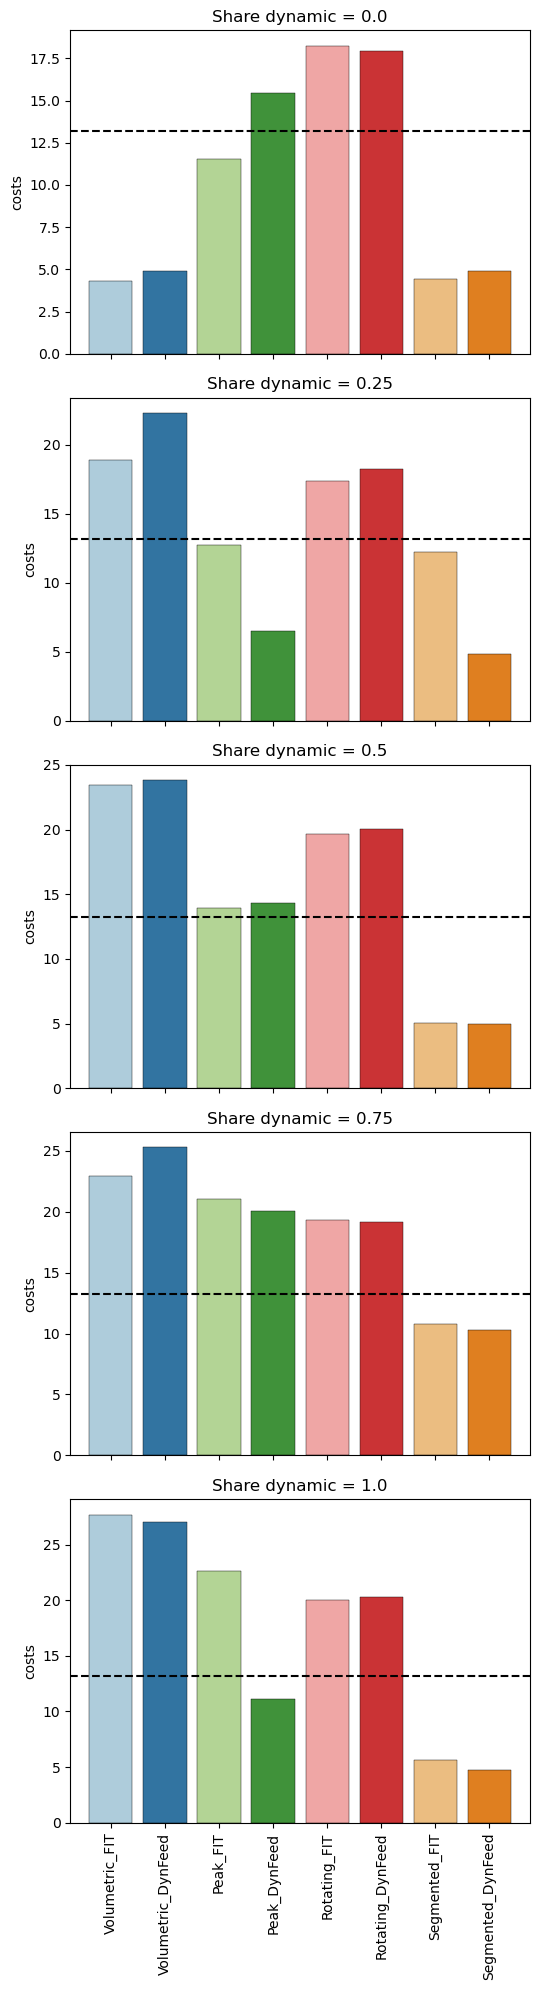

In [76]:
# Todo: in the end add up all grids

tmp = results_tmp.groupby(["tariff", "penetration", "mode"]).sum().reset_index()
order = ['Volumetric_FIT', 'Volumetric_DynFeed', 'Peak_FIT', 'Peak_DynFeed', 
         'Rotating_FIT', 'Rotating_DynFeed', 'Segmented_FIT', 'Segmented_DynFeed']
colors_tmp = sns.color_palette("Paired")
img_size =(5.5,20)
fig, axes = plt.subplots(5, figsize=img_size)
mode = "debug"

for idx, share_dyn in enumerate(penetrations):
    ax=axes[idx]
    plot_df = tmp.loc[(tmp["mode"]==mode)&(tmp.penetration==share_dyn)]
    sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k", order=order)
    ax.hlines(y=costs_constant, xmin=-0.75, xmax=7.75, color="k", linestyle="--")
    ax.set_xlabel("")
    ax.set_xlim(-0.75,7.75)
    if idx < 4:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f"Share dynamic = {share_dyn}")
    ax.legend().remove()
plt.tight_layout()

C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\862321357.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k", order=order)
C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\862321357.py:14: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k", order=order)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\862321357.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

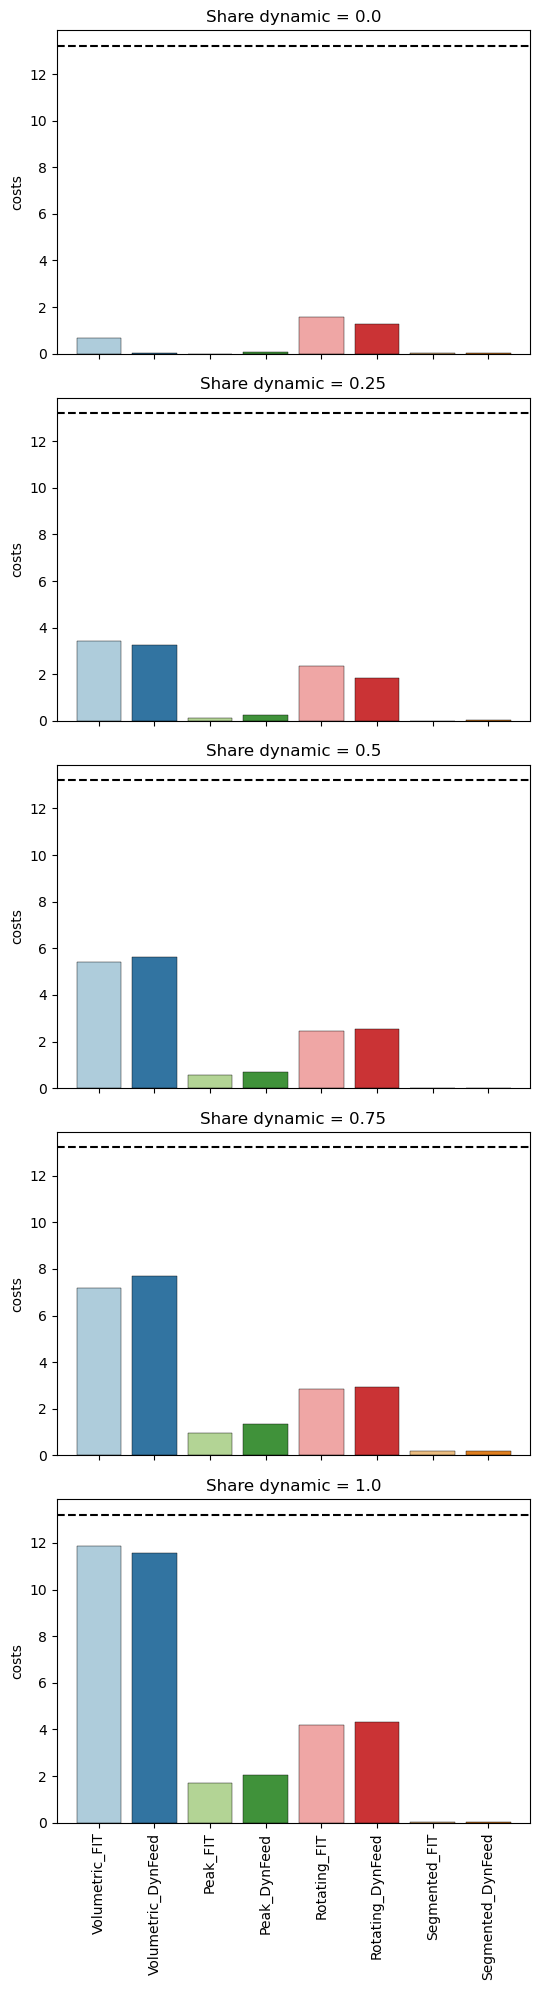

In [77]:
# Todo: in the end add up all grids

tmp = results_tmp.groupby(["tariff", "penetration", "mode"]).sum().reset_index()
order = ['Volumetric_FIT', 'Volumetric_DynFeed', 'Peak_FIT', 'Peak_DynFeed', 
         'Rotating_FIT', 'Rotating_DynFeed', 'Segmented_FIT', 'Segmented_DynFeed']
colors_tmp = sns.color_palette("Paired")
img_size =(5.5,20)
fig, axes = plt.subplots(5, figsize=img_size)
mode = "load"

for idx, share_dyn in enumerate(penetrations):
    ax=axes[idx]
    plot_df = tmp.loc[(tmp["mode"]==mode)&(tmp.penetration==share_dyn)]
    sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k", order=order)
    ax.hlines(y=costs_constant, xmin=-0.75, xmax=7.75, color="k", linestyle="--")
    ax.set_xlabel("")
    ax.set_xlim(-0.75,7.75)
    if idx < 4:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f"Share dynamic = {share_dyn}")
    ax.legend().remove()
plt.tight_layout()

C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\3396884543.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k", order=order)
C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\3396884543.py:14: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k", order=order)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\aheider\AppData\Local\Temp\ipykernel_13104\3396884543.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

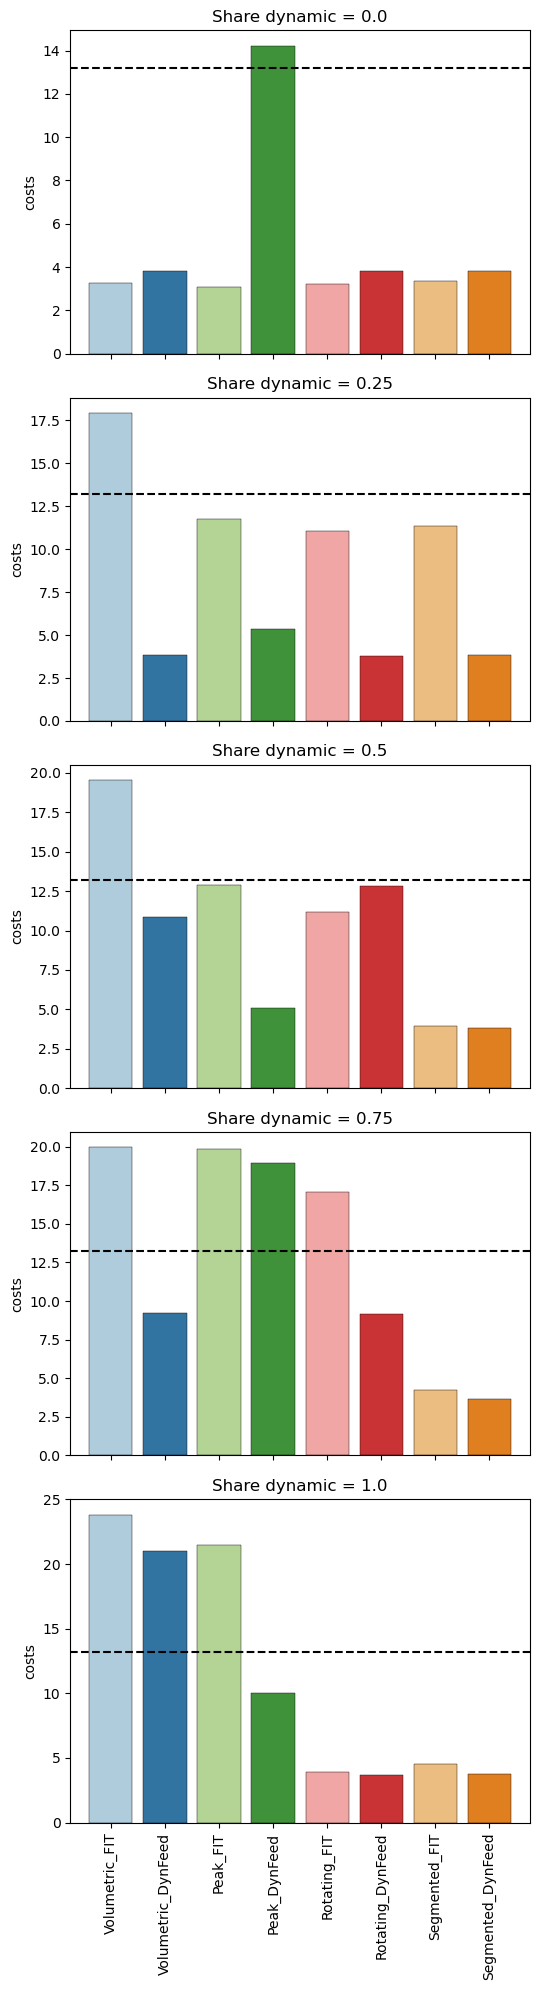

In [78]:
# Todo: in the end add up all grids

tmp = results_tmp.groupby(["tariff", "penetration", "mode"]).sum().reset_index()
order = ['Volumetric_FIT', 'Volumetric_DynFeed', 'Peak_FIT', 'Peak_DynFeed', 
         'Rotating_FIT', 'Rotating_DynFeed', 'Segmented_FIT', 'Segmented_DynFeed']
colors_tmp = sns.color_palette("Paired")
img_size =(5.5,20)
fig, axes = plt.subplots(5, figsize=img_size)
mode = "feed-in"

for idx, share_dyn in enumerate(penetrations):
    ax=axes[idx]
    plot_df = tmp.loc[(tmp["mode"]==mode)&(tmp.penetration==share_dyn)]
    sns.barplot(data=plot_df, x="tariff", y="costs", palette=colors_tmp, ax=ax, linewidth=0.3, edgecolor="k", order=order)
    ax.hlines(y=costs_constant, xmin=-0.75, xmax=7.75, color="k", linestyle="--")
    ax.set_xlabel("")
    ax.set_xlim(-0.75,7.75)
    if idx < 4:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f"Share dynamic = {share_dyn}")
    ax.legend().remove()
plt.tight_layout()